In [1]:
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt

In [4]:
experiment = pd.read_pickle('data/Reddit-experiment.pickle')

In [15]:
from innertube import InnerTube, Client
from pprint import pprint

video_id = 'zL3wWykAKfs' # Still Woozy - Goodie Bag

ios = InnerTube("WEB")

data = ios.player(video_id=video_id)
print(data['videoDetails'])

{'videoId': 'zL3wWykAKfs', 'title': 'Still Woozy - Goodie Bag', 'lengthSeconds': '165', 'channelId': 'UCFvpiAtMwvCTCZuEM8Ua8Uw', 'isOwnerViewing': False, 'shortDescription': 'Directed by Shawheen Keyani\nDirector of Photography  -  Manuel Branaa\n\nFollow Still Woozy\n\nhttps://www.instagram.com/still_woozy/?hl=en\nhttps://www.facebook.com/Stillwoozy/', 'isCrawlable': True, 'thumbnail': {'thumbnails': [{'url': 'https://i.ytimg.com/vi/zL3wWykAKfs/hqdefault.jpg?sqp=-oaymwEbCKgBEF5IVfKriqkDDggBFQAAiEIYAXABwAEG&rs=AOn4CLA74LEt6oYeEM2RUOfYIFhS5m2X1Q', 'width': 168, 'height': 94}, {'url': 'https://i.ytimg.com/vi/zL3wWykAKfs/hqdefault.jpg?sqp=-oaymwEbCMQBEG5IVfKriqkDDggBFQAAiEIYAXABwAEG&rs=AOn4CLDz9kbZfFOtiYcNWTji4jcejnHRmA', 'width': 196, 'height': 110}, {'url': 'https://i.ytimg.com/vi/zL3wWykAKfs/hqdefault.jpg?sqp=-oaymwEcCPYBEIoBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLDXdxJXT8N0fK_ft9lNk6JjuNGtmQ', 'width': 246, 'height': 138}, {'url': 'https://i.ytimg.com/vi/zL3wWykAKfs/hqdefault.jpg?sq

In [38]:
video_id = "zL3wWykAKfs"
client = InnerTube("WEB")
data = client.next(video_id)
like_count = data["contents"]["twoColumnWatchNextResults"]["results"]["results"]["contents"][0]["videoPrimaryInfoRenderer"]["videoActions"]["menuRenderer"]["topLevelButtons"][0]["segmentedLikeDislikeButtonRenderer"]["likeButton"]["toggleButtonRenderer"]["defaultText"]["accessibility"]["accessibilityData"]["label"].split(" ")[0]

like_count = int(like_count.replace(",", ""))
print(like_count)

269990


In [39]:
data['contents']['twoColumnWatchNextResults']['results']

{'contents': {'twoColumnWatchNextResults': {'results': {'results': {'contents': [{'videoPrimaryInfoRenderer': {'title': {'runs': [{'text': 'Still Woozy - Goodie Bag'}]},
        'viewCount': {'videoViewCountRenderer': {'viewCount': {'simpleText': '8,081,900 views'},
          'shortViewCount': {'simpleText': '8M views'},
          'originalViewCount': '0'}},
        'videoActions': {'menuRenderer': {'items': [{'menuNavigationItemRenderer': {'text': {'runs': [{'text': 'Report'}]},
             'icon': {'iconType': 'FLAG'},
             'navigationEndpoint': {'clickTrackingParams': 'CPkBEMyrARgAIhMI0InI89T0gwMV7rTCAR2A9Ab1',
              'commandMetadata': {'webCommandMetadata': {'ignoreNavigation': True}},
              'modalEndpoint': {'modal': {'modalWithTitleAndButtonRenderer': {'title': {'runs': [{'text': 'Need to report the video?'}]},
                 'content': {'runs': [{'text': 'Sign in to report inappropriate content.'}]},
                 'button': {'buttonRenderer': {'styl

In [8]:
subjects = experiment.get_subjects()
control = []
for subject in subjects:
    if subject.get_group() == 'control':
        control.append(subject)l

TypeError: list indices must be integers or slices, not str

In [4]:
reddit = pd.read_pickle('Reddit-results.pkl')

In [5]:
def comparePrePost(user):
    action = user[0]['action']
    topic = user[0]['topic']
    if action == '':
        treatment = 'control \t'
    else:
        treatment = f"{action}: {topic}"

    pre = user[1]['pre']
    if pre == None:
        return None
    pre_ids = [p['id'] for p in pre]
    post = user[4]['post']
    post_ids = [p['id'] for p in post]

    # compare pre and post id list and calculate the number of common ids

    common_ids = len(set(pre_ids).intersection(set(post_ids)))
    total_ids = len(set(pre_ids).union(set(post_ids)))+1

    id_ratio = int((common_ids/total_ids) * 100)

    pre_subs = [p['subreddit'] for p in pre]
    post_subs = [p['subreddit'] for p in post]

    common_subs = len(set(pre_subs).intersection(set(post_subs)))
    total_subs = len(set(pre_subs).union(set(post_subs)))+1

    sub_ratio = int((common_subs/total_subs) * 100)

    print(f"ids {treatment} \t: {common_ids}/{total_ids} = \t {id_ratio}")
    print(f"sub {treatment} \t: {common_subs}/{total_subs} = \t {sub_ratio}")

    return treatment, pre_subs, post_subs

In [6]:
subjects = dict()
for user in reddit:
    print(user[0]['user'])
    treatment, pre, post = comparePrePost(user)
    name = user[0]['user']
    subjects[name] = {'pre': pre, 'post': post}

like_biden_0
ids like: biden 	: 1/233 = 	 0
sub like: biden 	: 24/77 = 	 31
like_biden_1
ids like: biden 	: 1/158 = 	 0
sub like: biden 	: 18/75 = 	 24
open_biden_0
ids open: biden 	: 0/159 = 	 0
sub open: biden 	: 14/90 = 	 15
open_biden_1
ids open: biden 	: 0/81 = 	 0
sub open: biden 	: 0/50 = 	 0
open_trump_0
ids open: trump 	: 0/176 = 	 0
sub open: trump 	: 18/79 = 	 22
open_trump_1
ids open: trump 	: 1/173 = 	 0
sub open: trump 	: 20/78 = 	 25
like_trump_0
ids like: trump 	: 0/190 = 	 0
sub like: trump 	: 20/82 = 	 24
like_trump_1
ids like: trump 	: 0/189 = 	 0
sub like: trump 	: 18/79 = 	 22
__0
ids control 	 	: 0/158 = 	 0
sub control 	 	: 21/83 = 	 25
__1
ids control 	 	: 2/170 = 	 1
sub control 	 	: 31/78 = 	 39


In [7]:
from collections import Counter
def plotSubs(subjects, treatment):
    subject = subjects[treatment]
    pre = subject['pre']
    post = subject['post']

    pre_sub_count = Counter(pre)
    post_sub_count = Counter(post)

    predf = pd.DataFrame.from_dict(pre_sub_count, orient='index')
    postdf = pd.DataFrame.from_dict(post_sub_count, orient='index')

    df = pd.concat([predf, postdf], axis=1)
    df.fillna(0, inplace=True)
    df.columns = ['pre', 'post']
    df['diff'] = df['post'] - df['pre']
    df.sort_values(by='diff', ascending=False, inplace=True)
    df = df[['post', 'pre']]

    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (20,10)

    title = treatment
    df.plot(kind='bar', stacked=False, title=title)

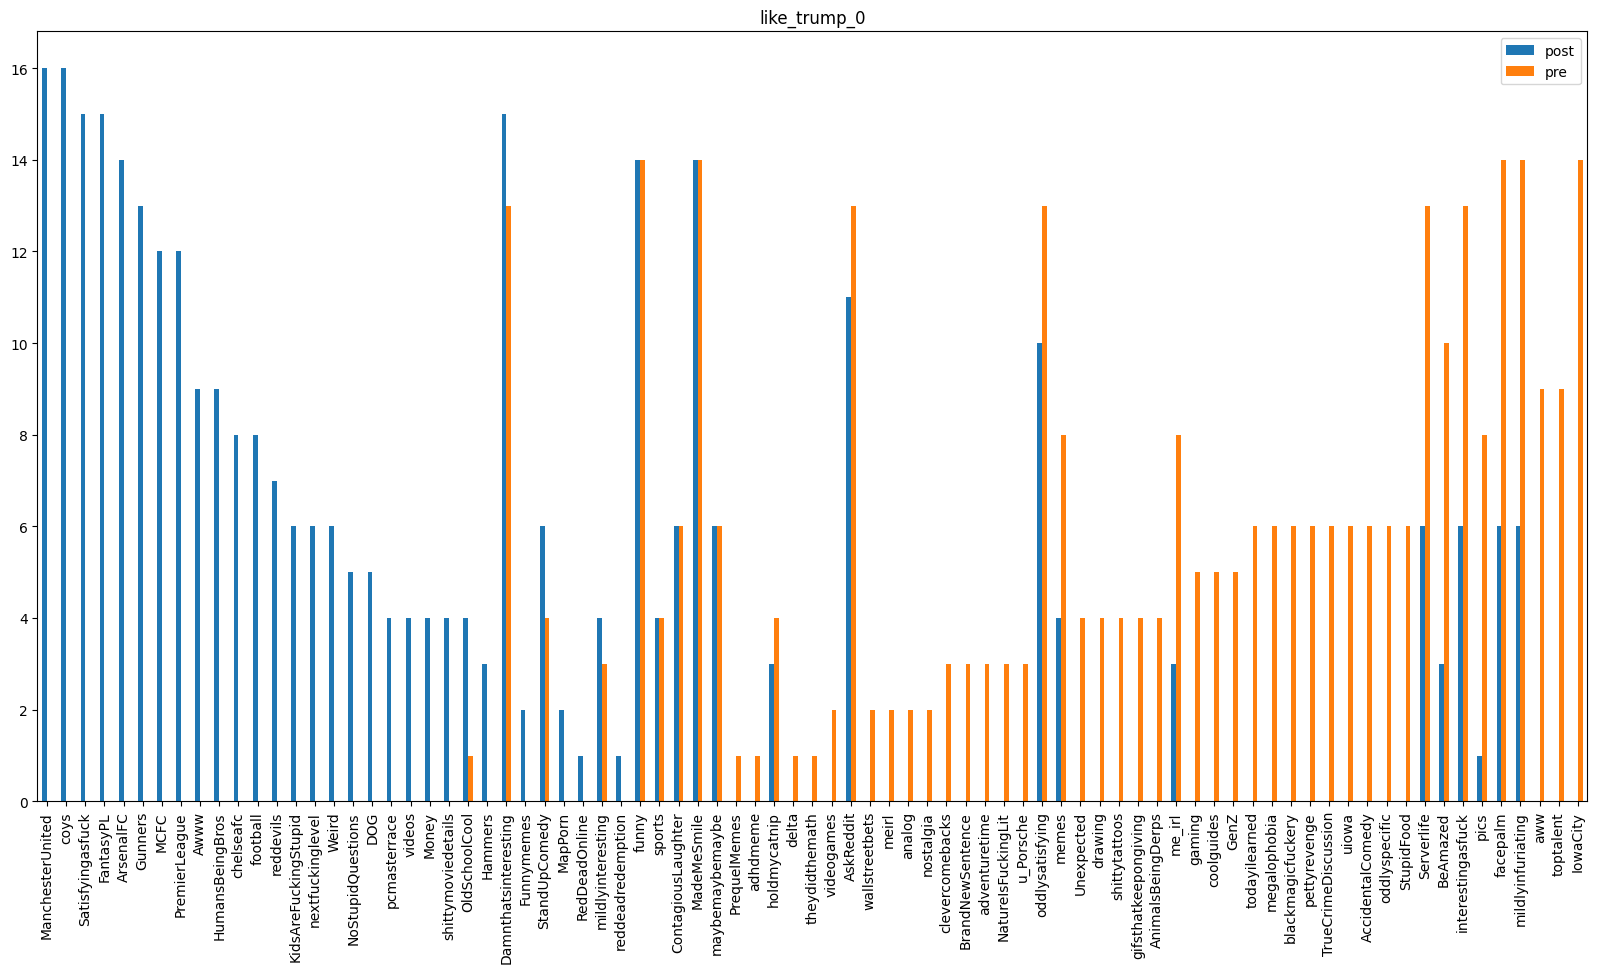

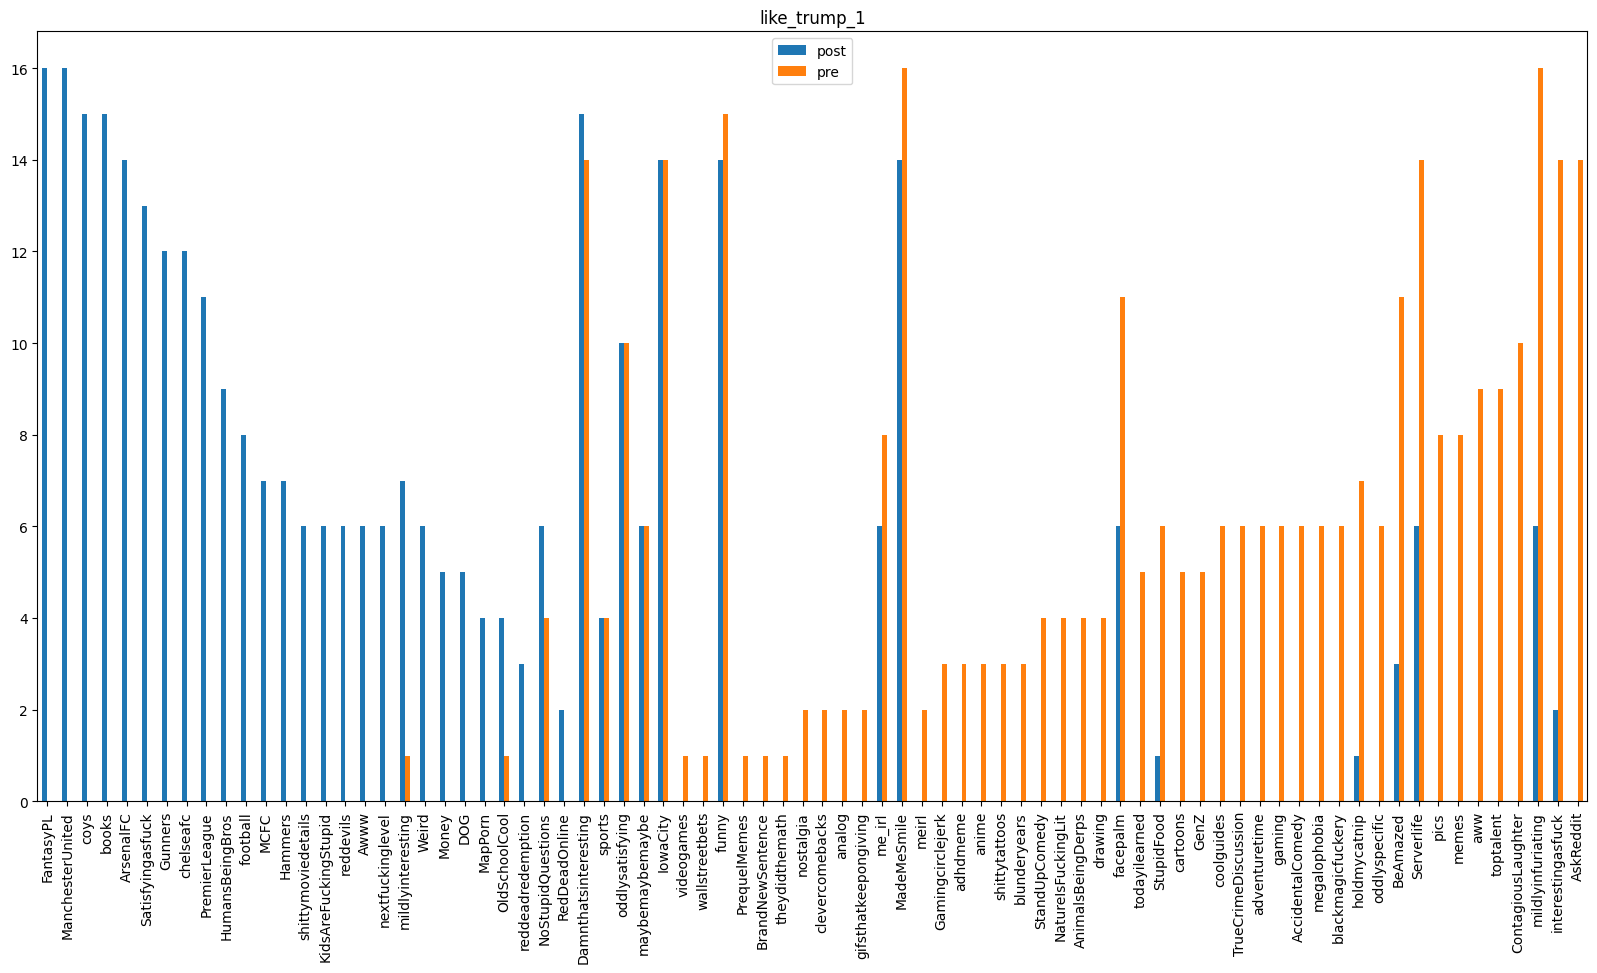

In [8]:
plotSubs(subjects, 'like_trump_0')
plotSubs(subjects, 'like_trump_1')

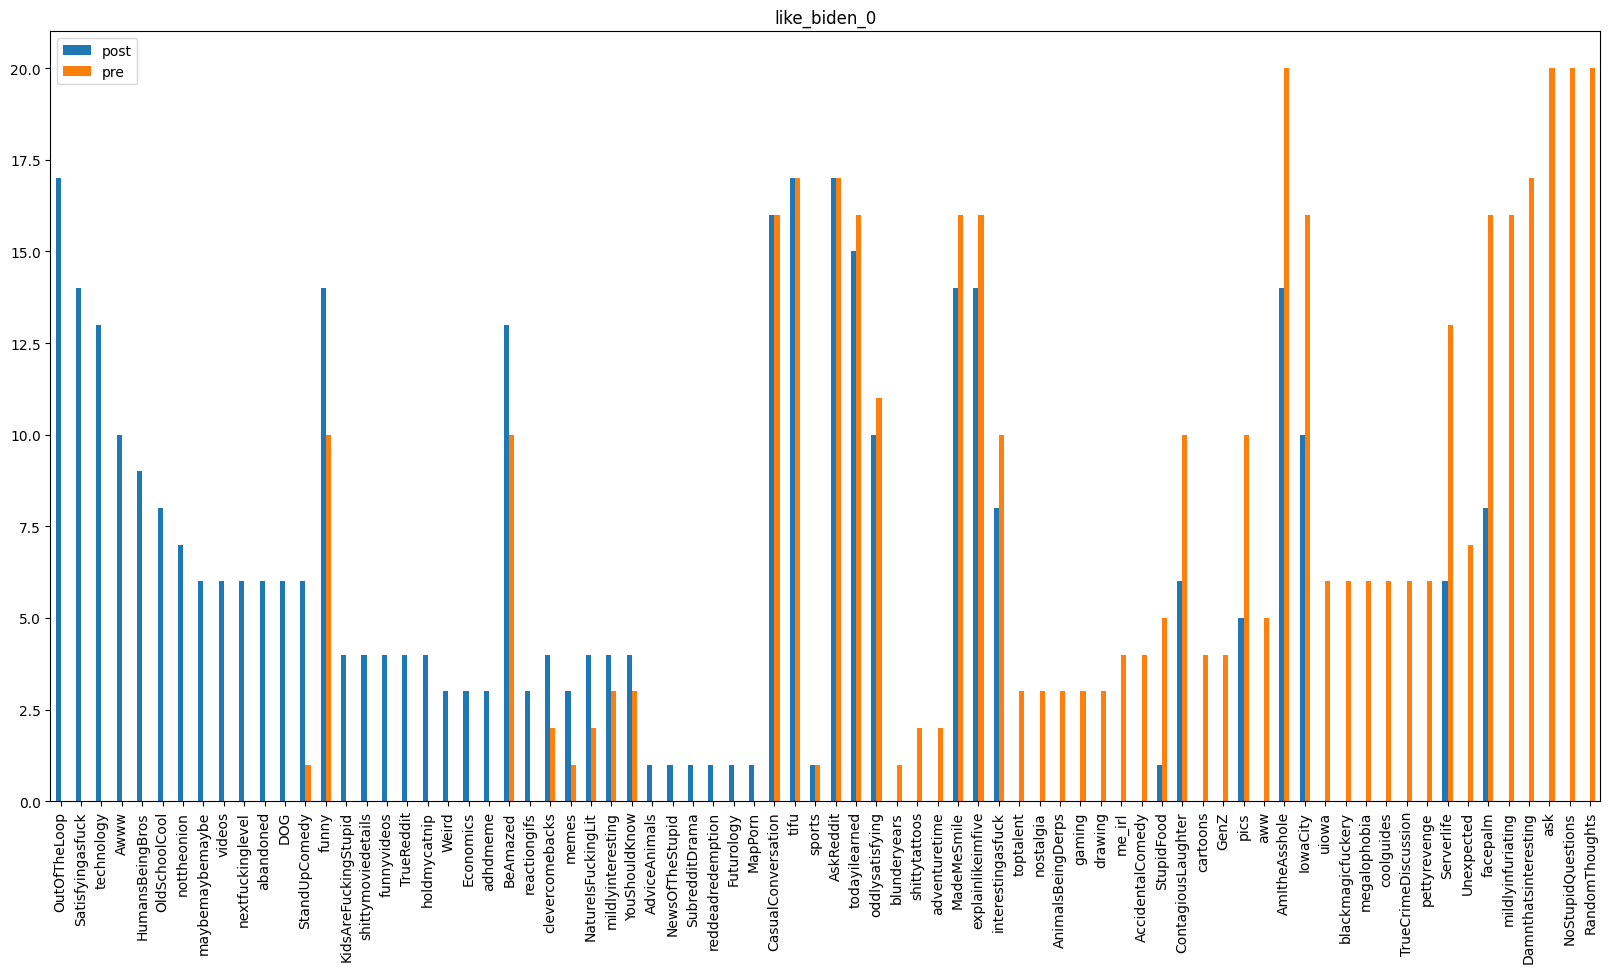

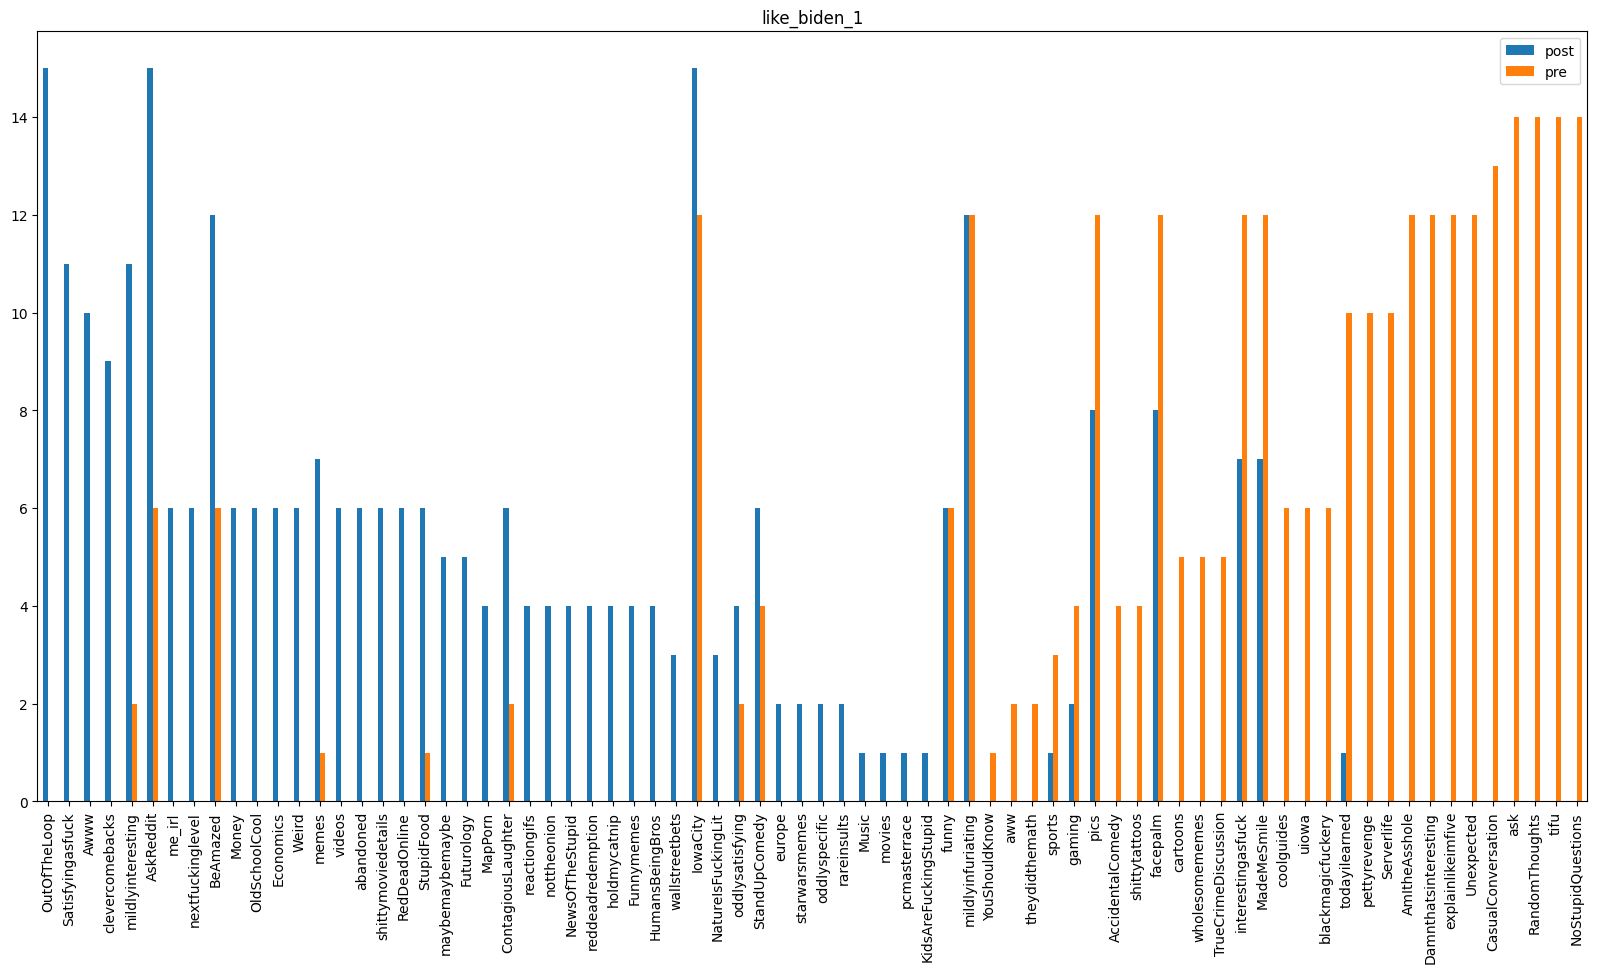

In [9]:
plotSubs(subjects, 'like_biden_0')
plotSubs(subjects, 'like_biden_1')

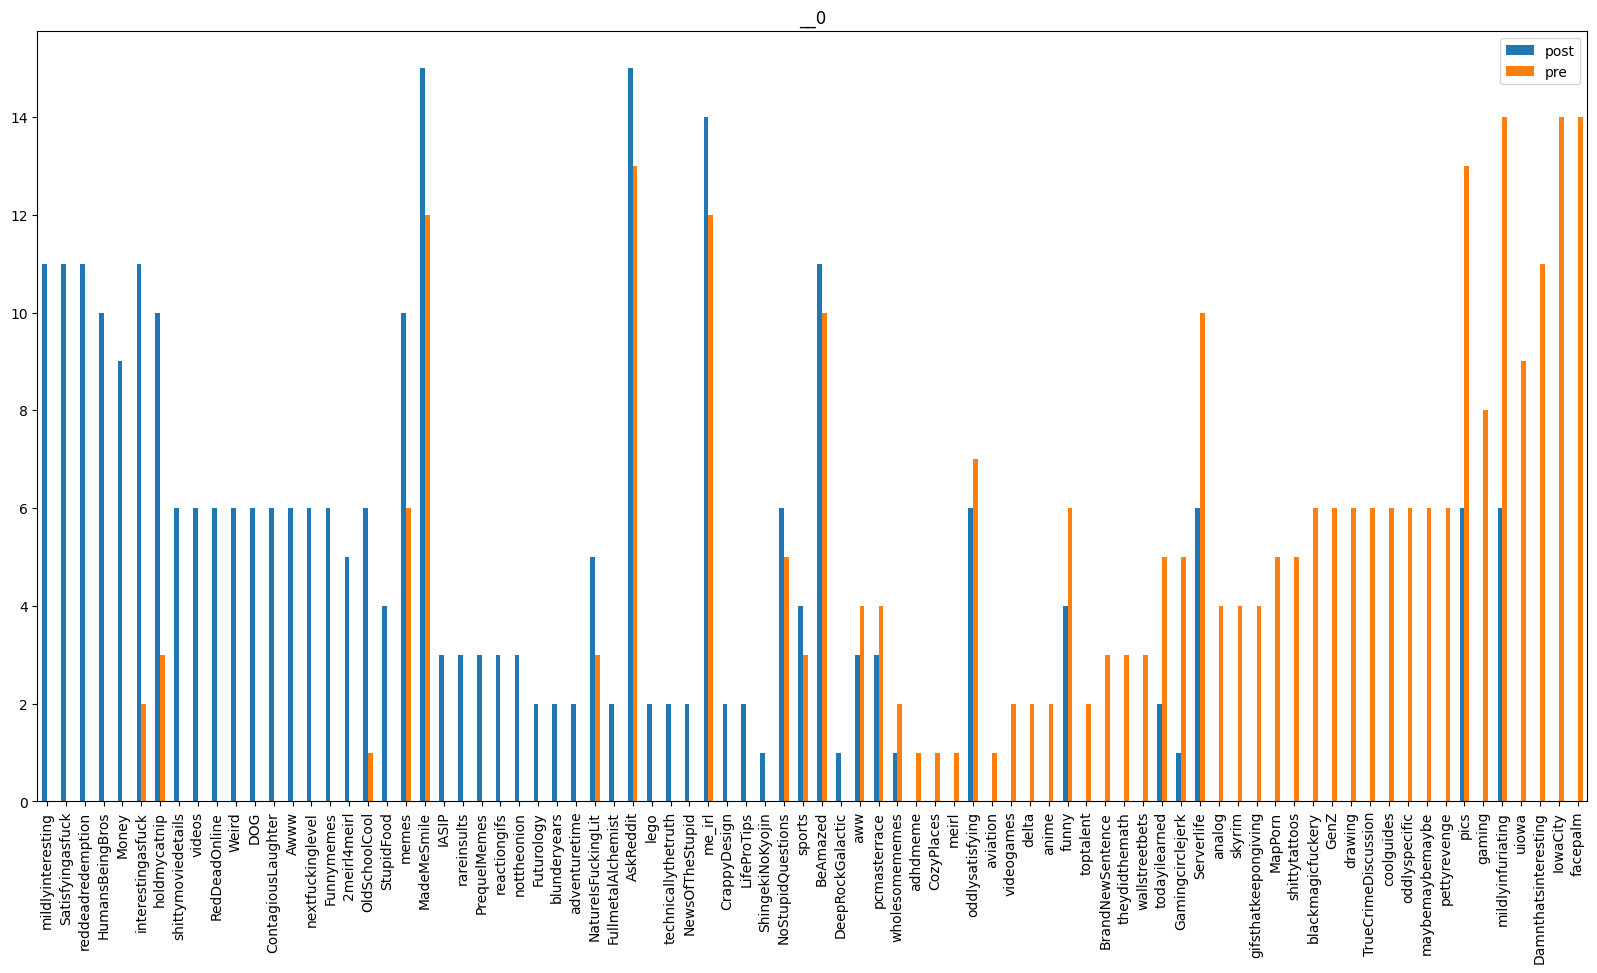

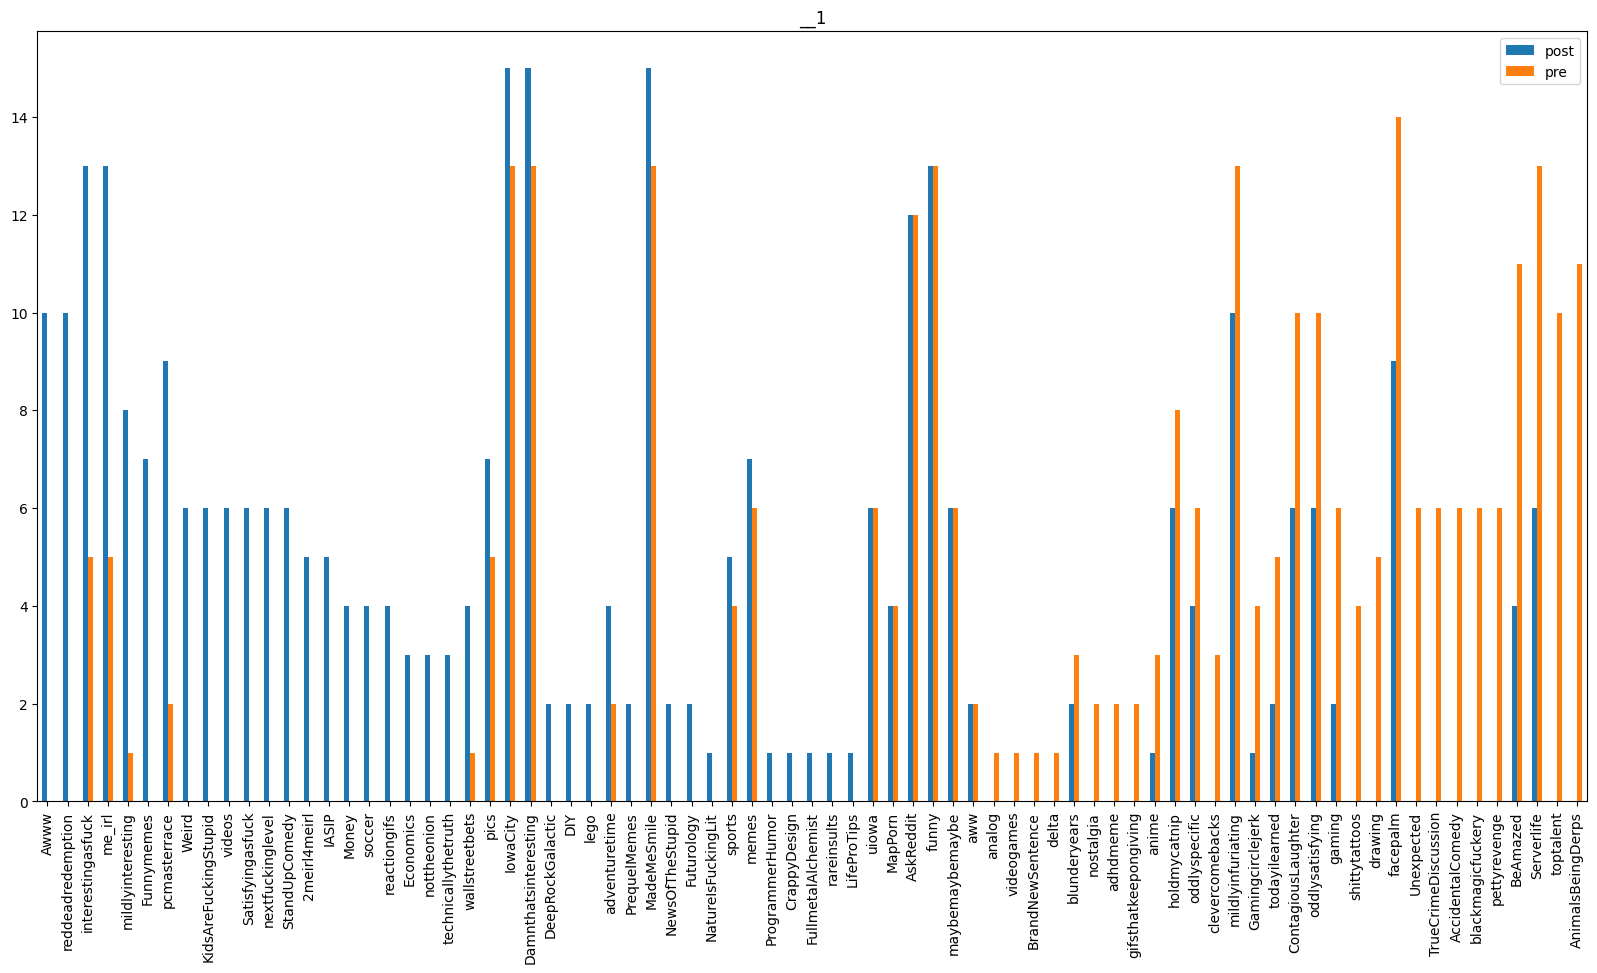

In [10]:
plotSubs(subjects, '__0')
plotSubs(subjects, '__1')

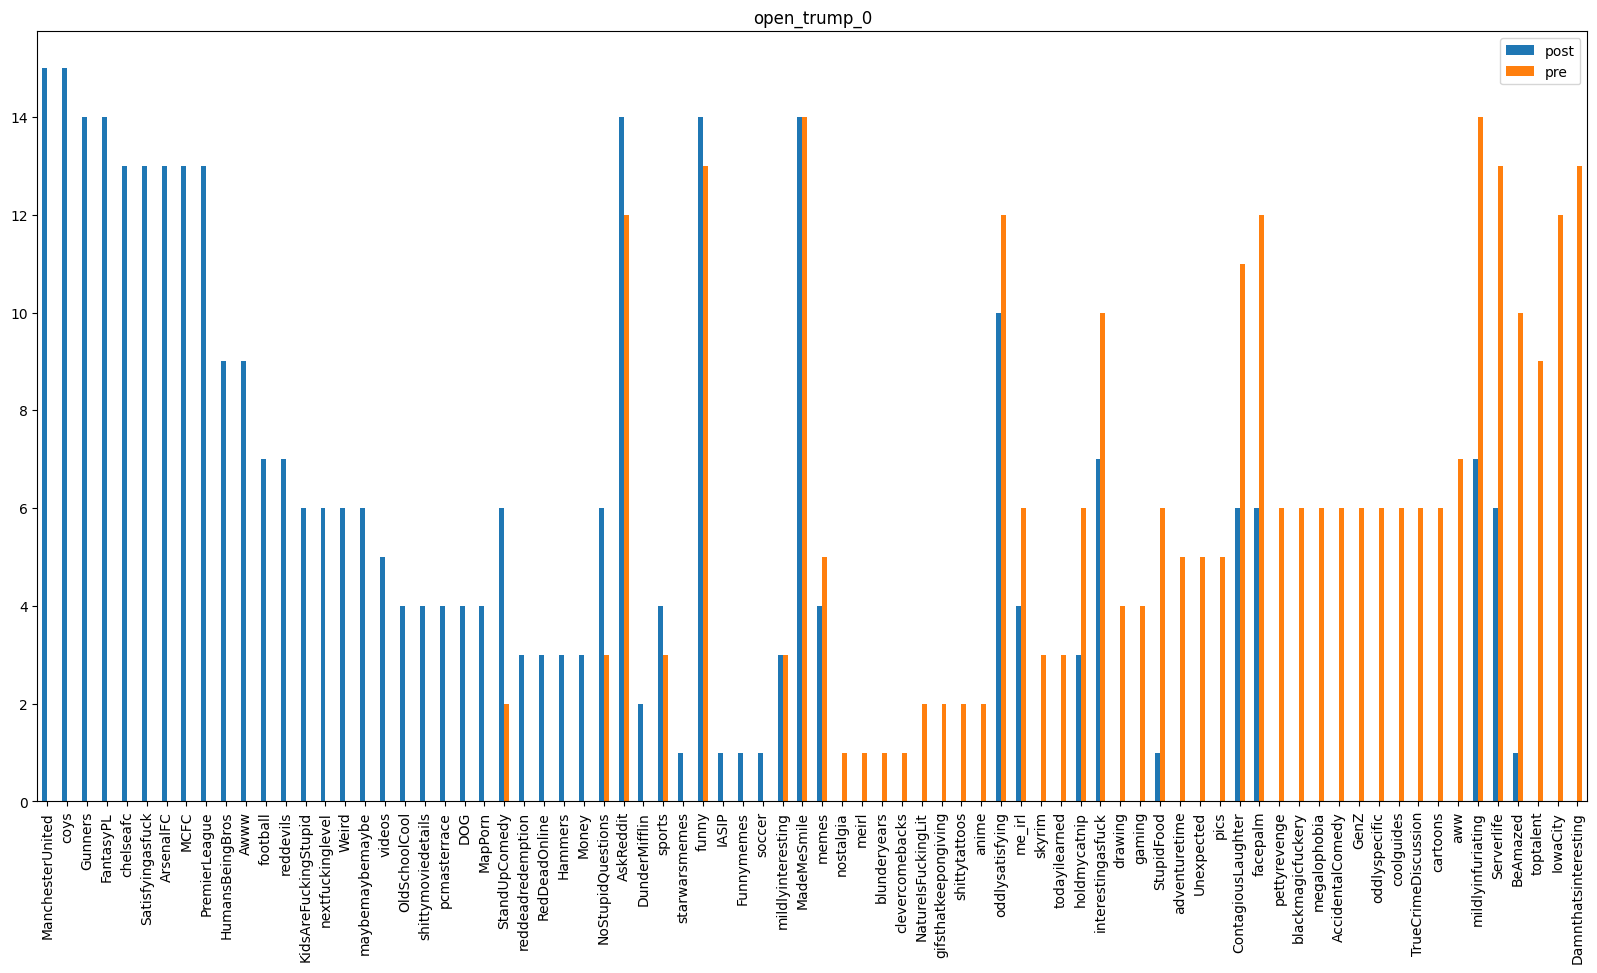

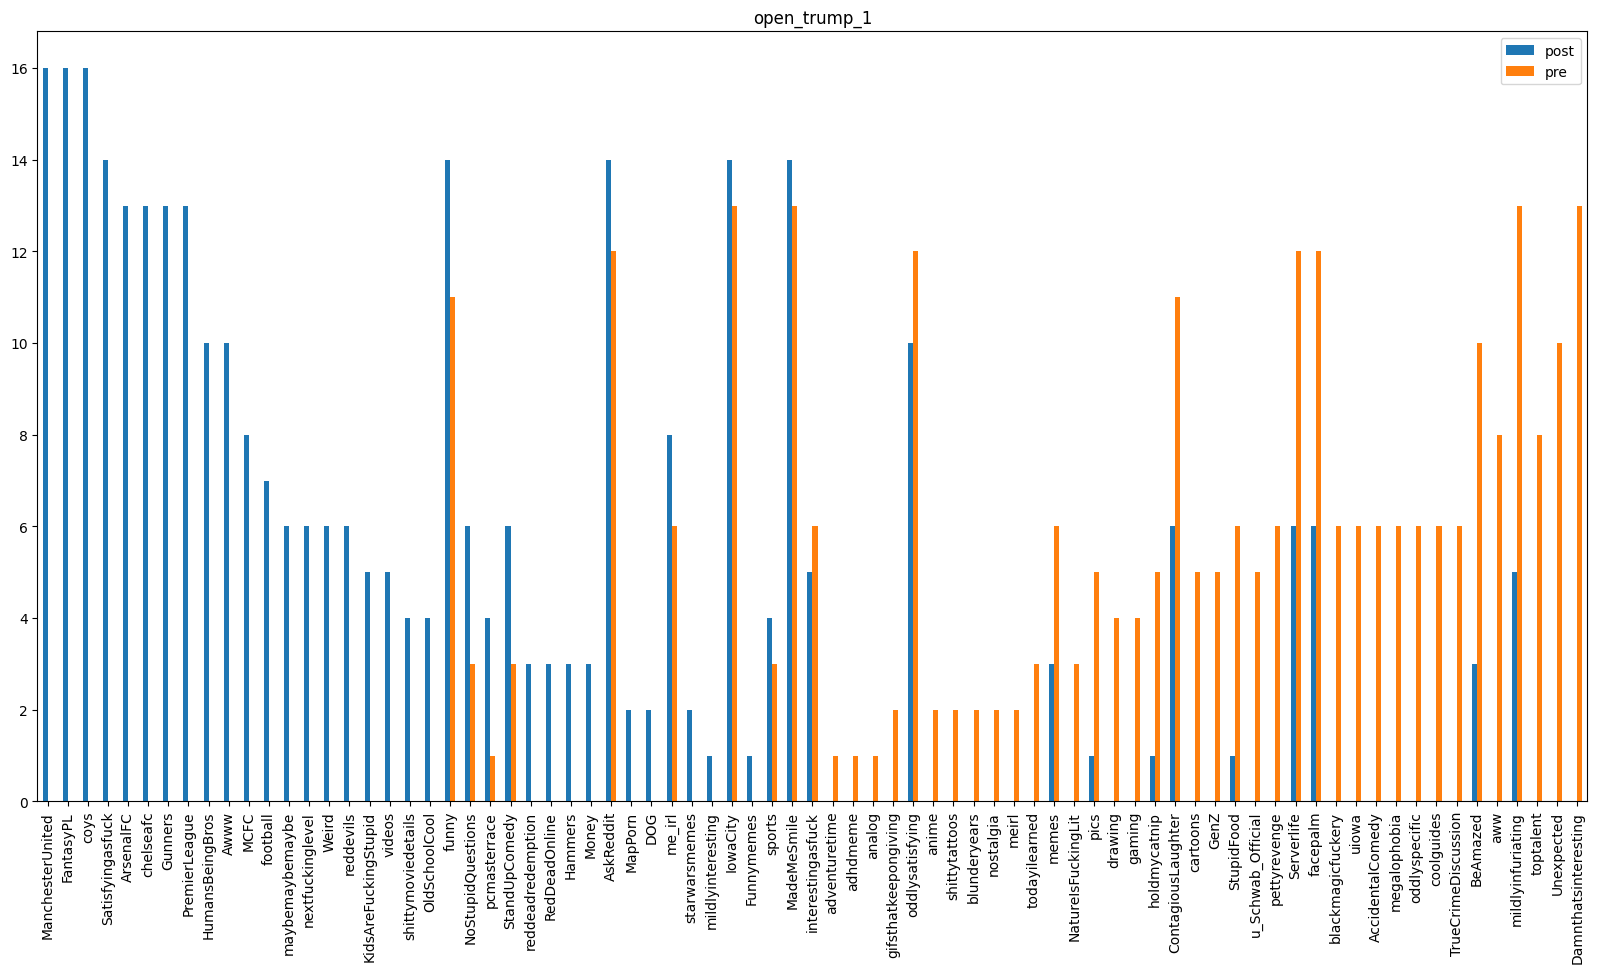

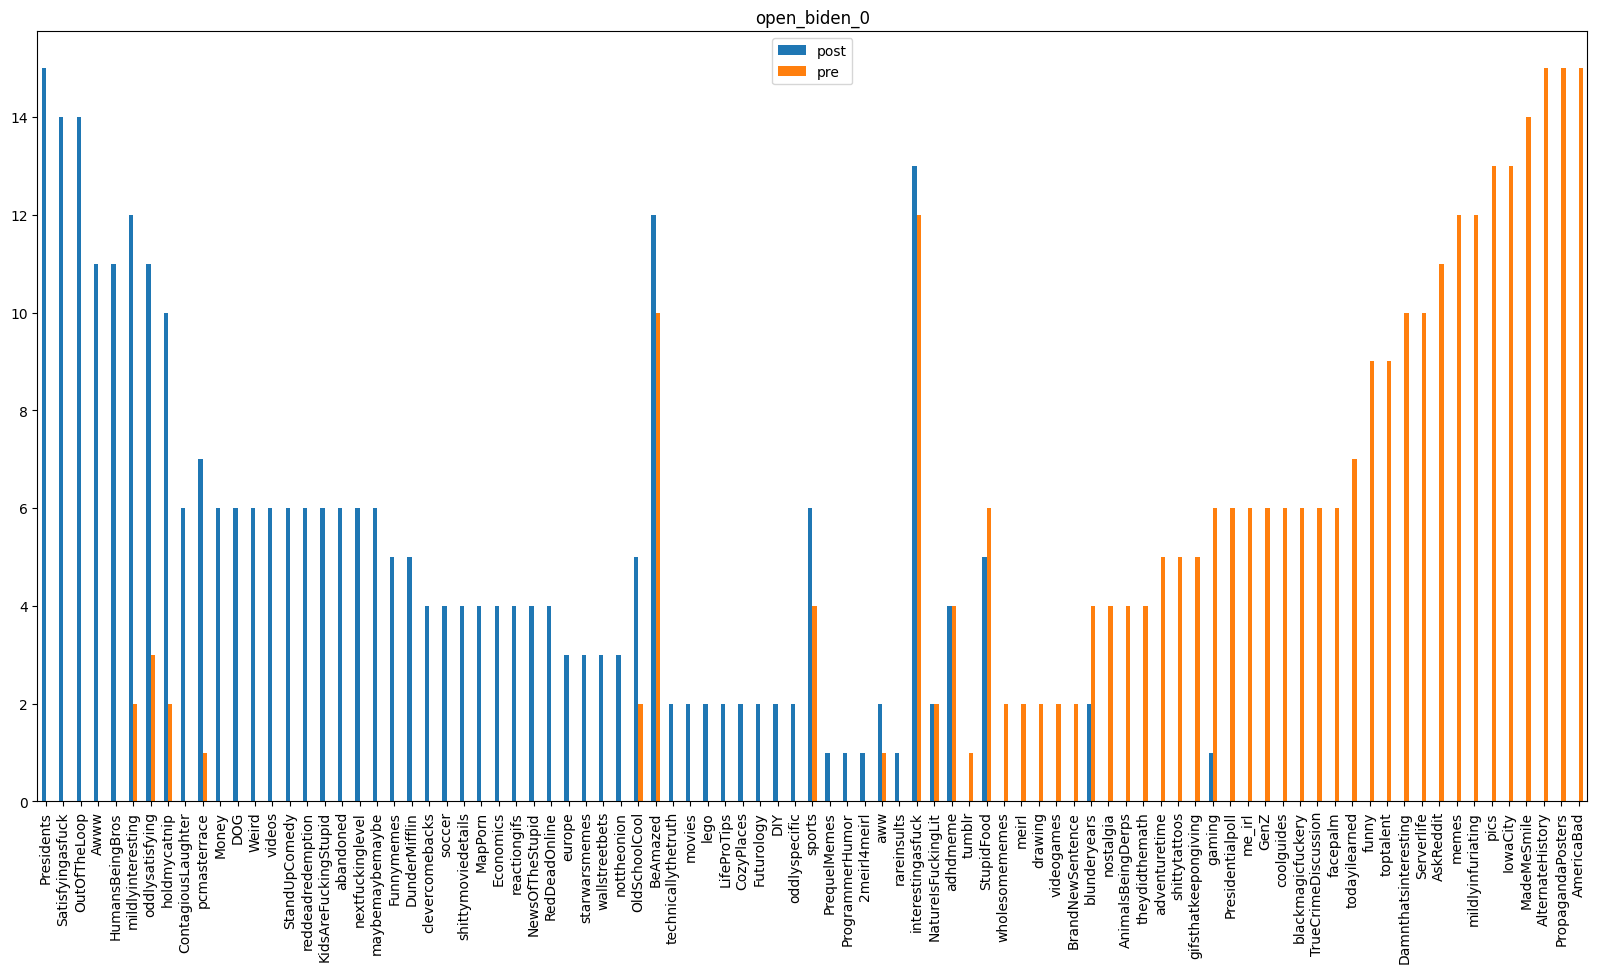

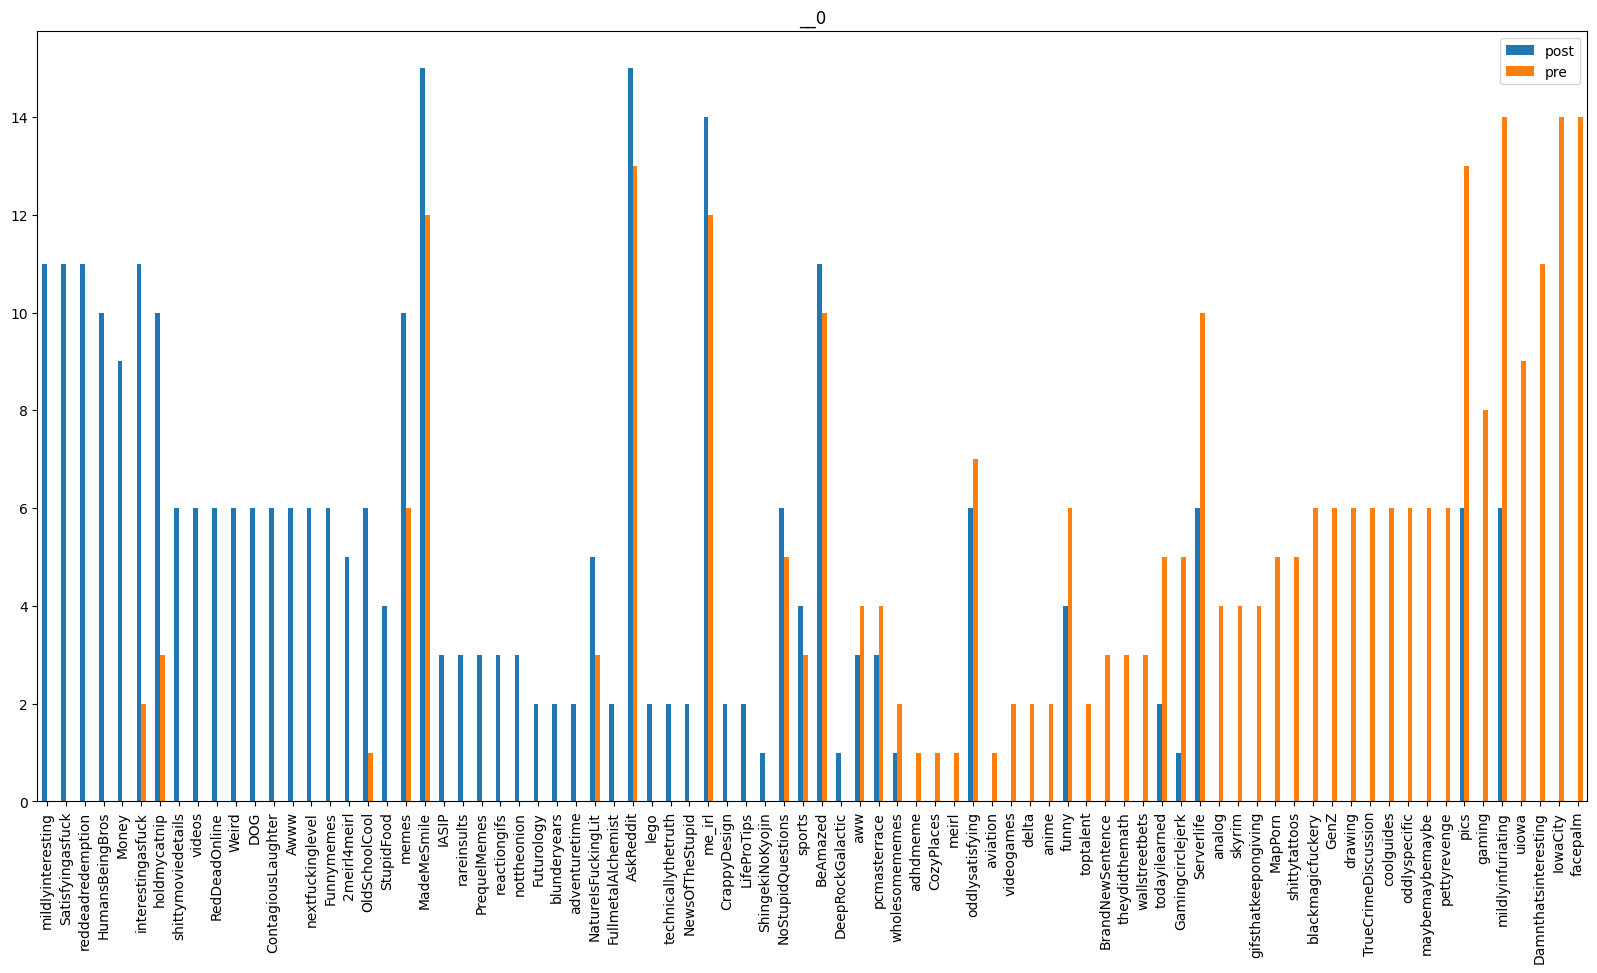

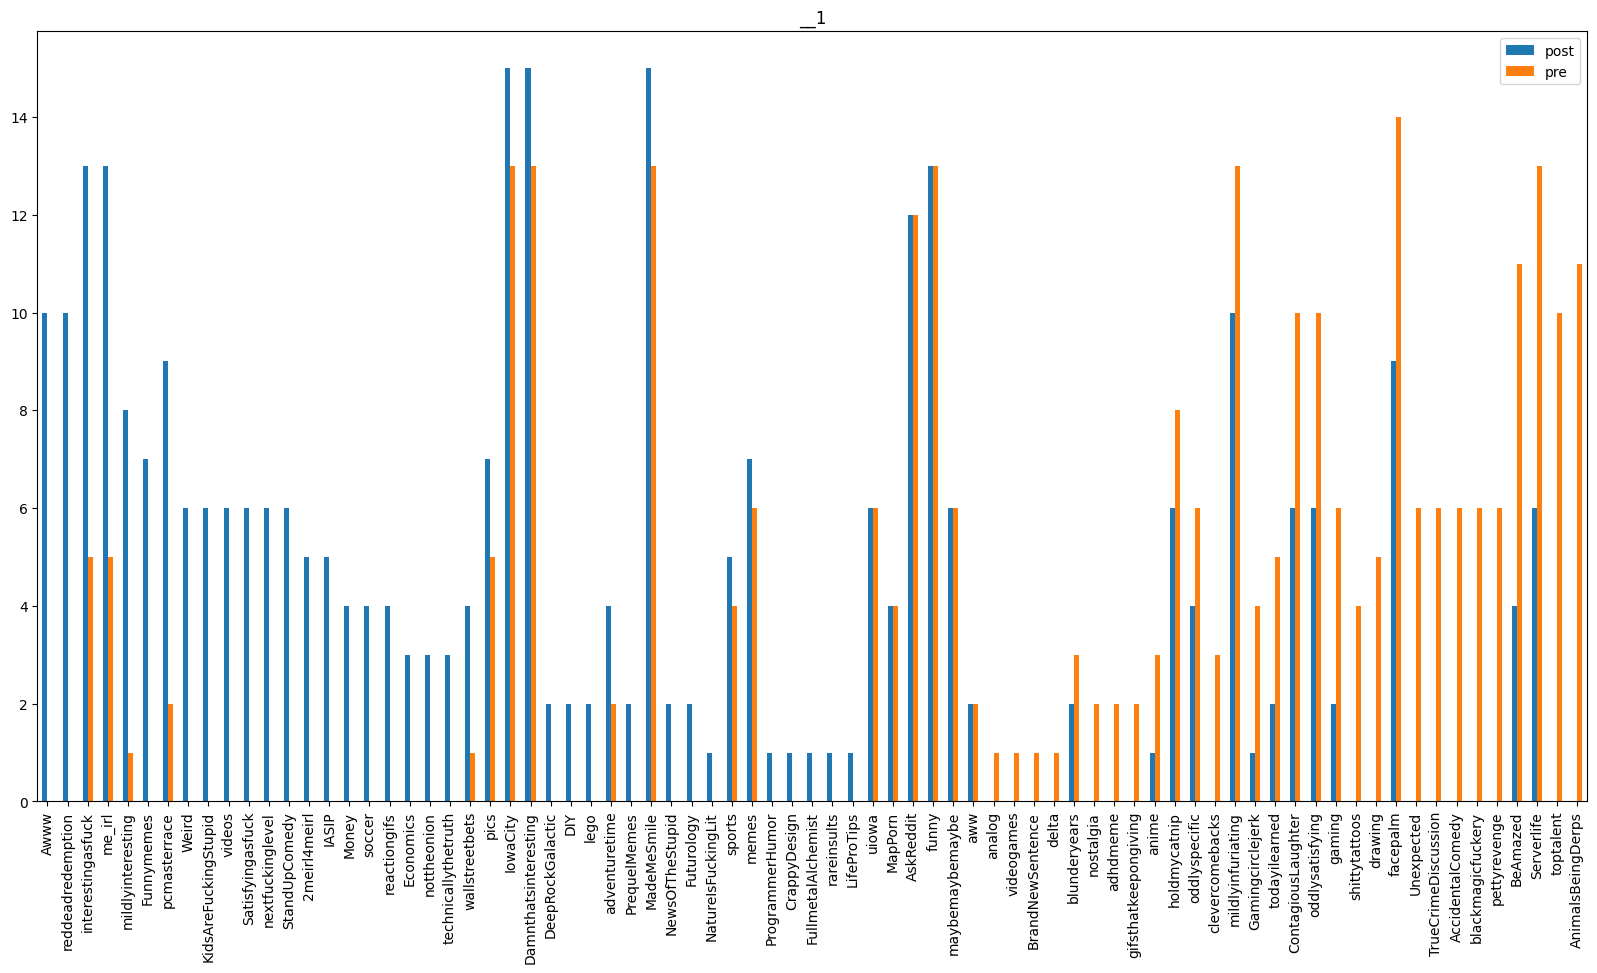

In [12]:
plotSubs(subjects, 'open_trump_0')
plotSubs(subjects, 'open_trump_1')

plotSubs(subjects, 'open_biden_0')

try:
    plotSubs(subjects, 'open_biden_1')
except:
    pass

plotSubs(subjects, '__0')
plotSubs(subjects, '__1')

In [13]:
twitter = pd.read_pickle('Twitter-results.pkl')

In [46]:
# remove punctuation
# remove stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import string

def removeStopwords(s):
    return [w for w in s if not w in stop_words]

def removePunctuation(s):
    return s.translate(str.maketrans('', '', string.punctuation))

def processText(t):
    t = t.lower()
    t = t.replace('\n', ' ')
    t = removePunctuation(t)
    t = t.split(' ')
    t = removeStopwords(t)
    return t

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hussa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


like biden
like biden
open biden
open biden
open trump
open trump
like trump
like trump
 
 


C:\Users\hussa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 120411 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC SMALL F}) missing from current font.
  func(*args, **kwargs)
C:\Users\hussa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 120423 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC SMALL R}) missing from current font.
  func(*args, **kwargs)
C:\Users\hussa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 120420 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC SMALL O}) missing from current font.
  func(*args, **kwargs)
C:\Users\hussa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python

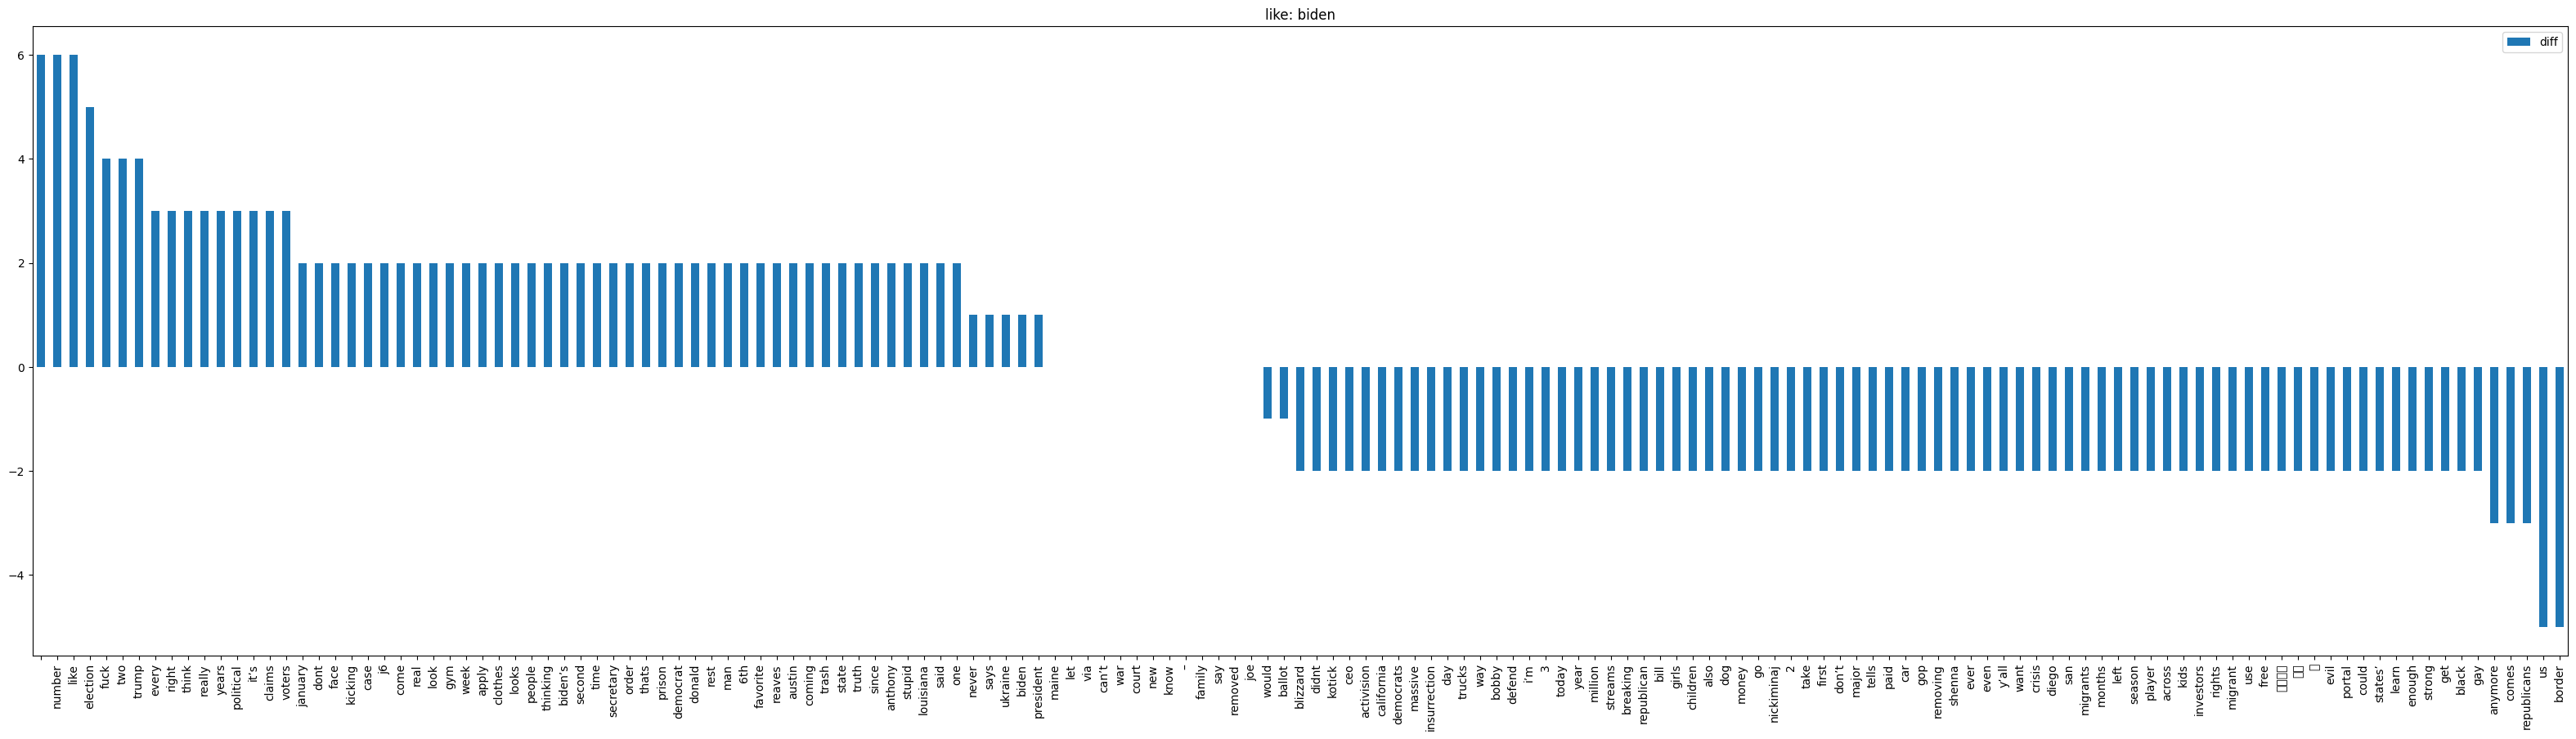

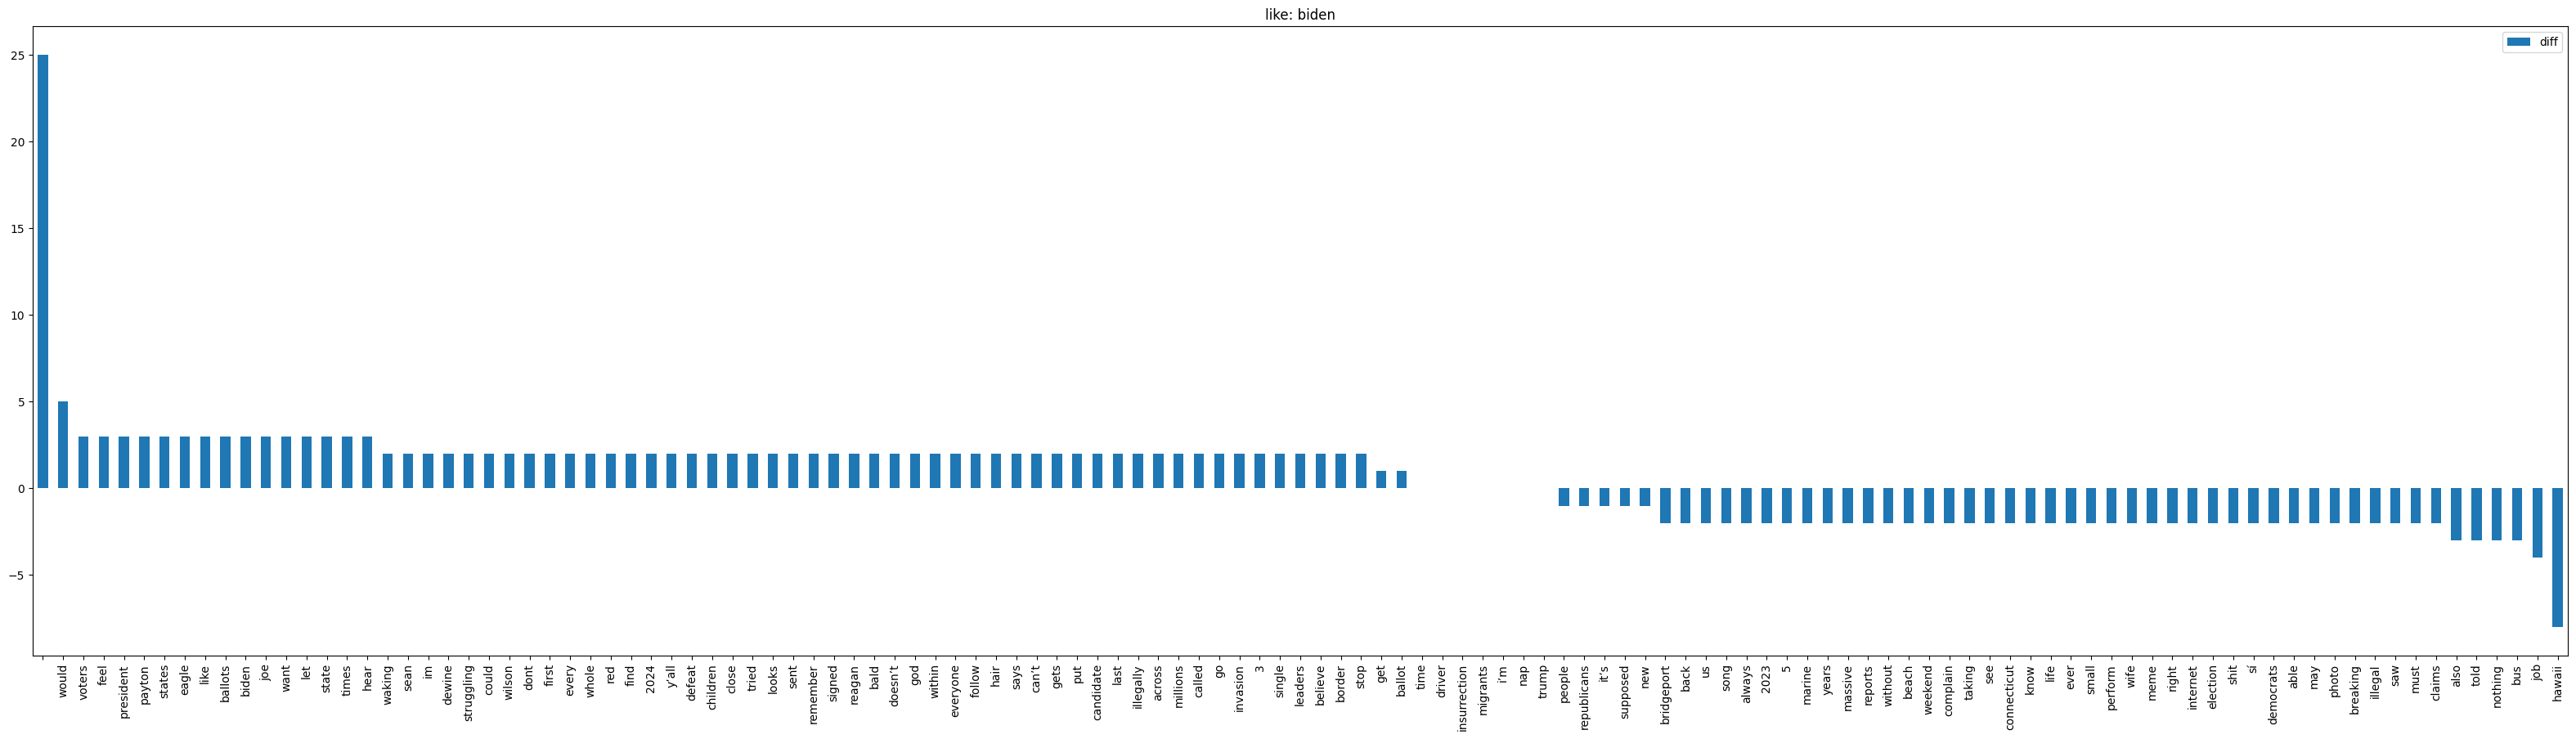

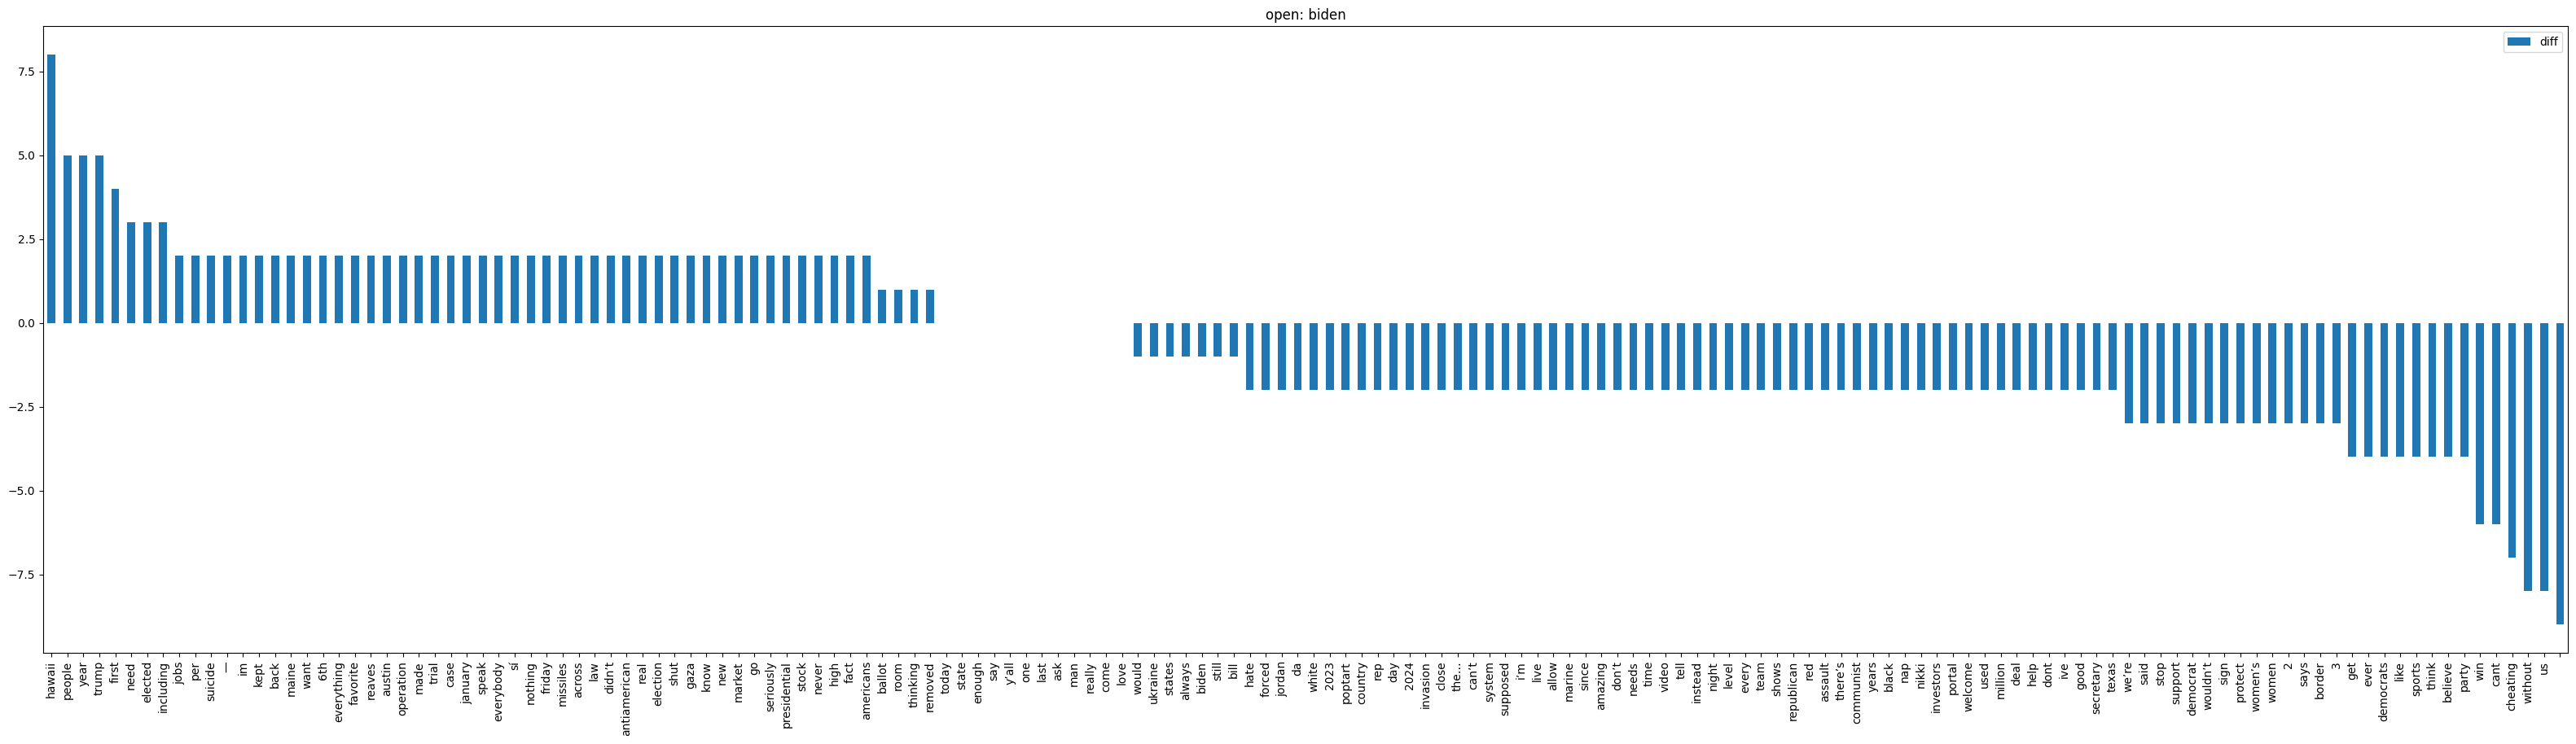

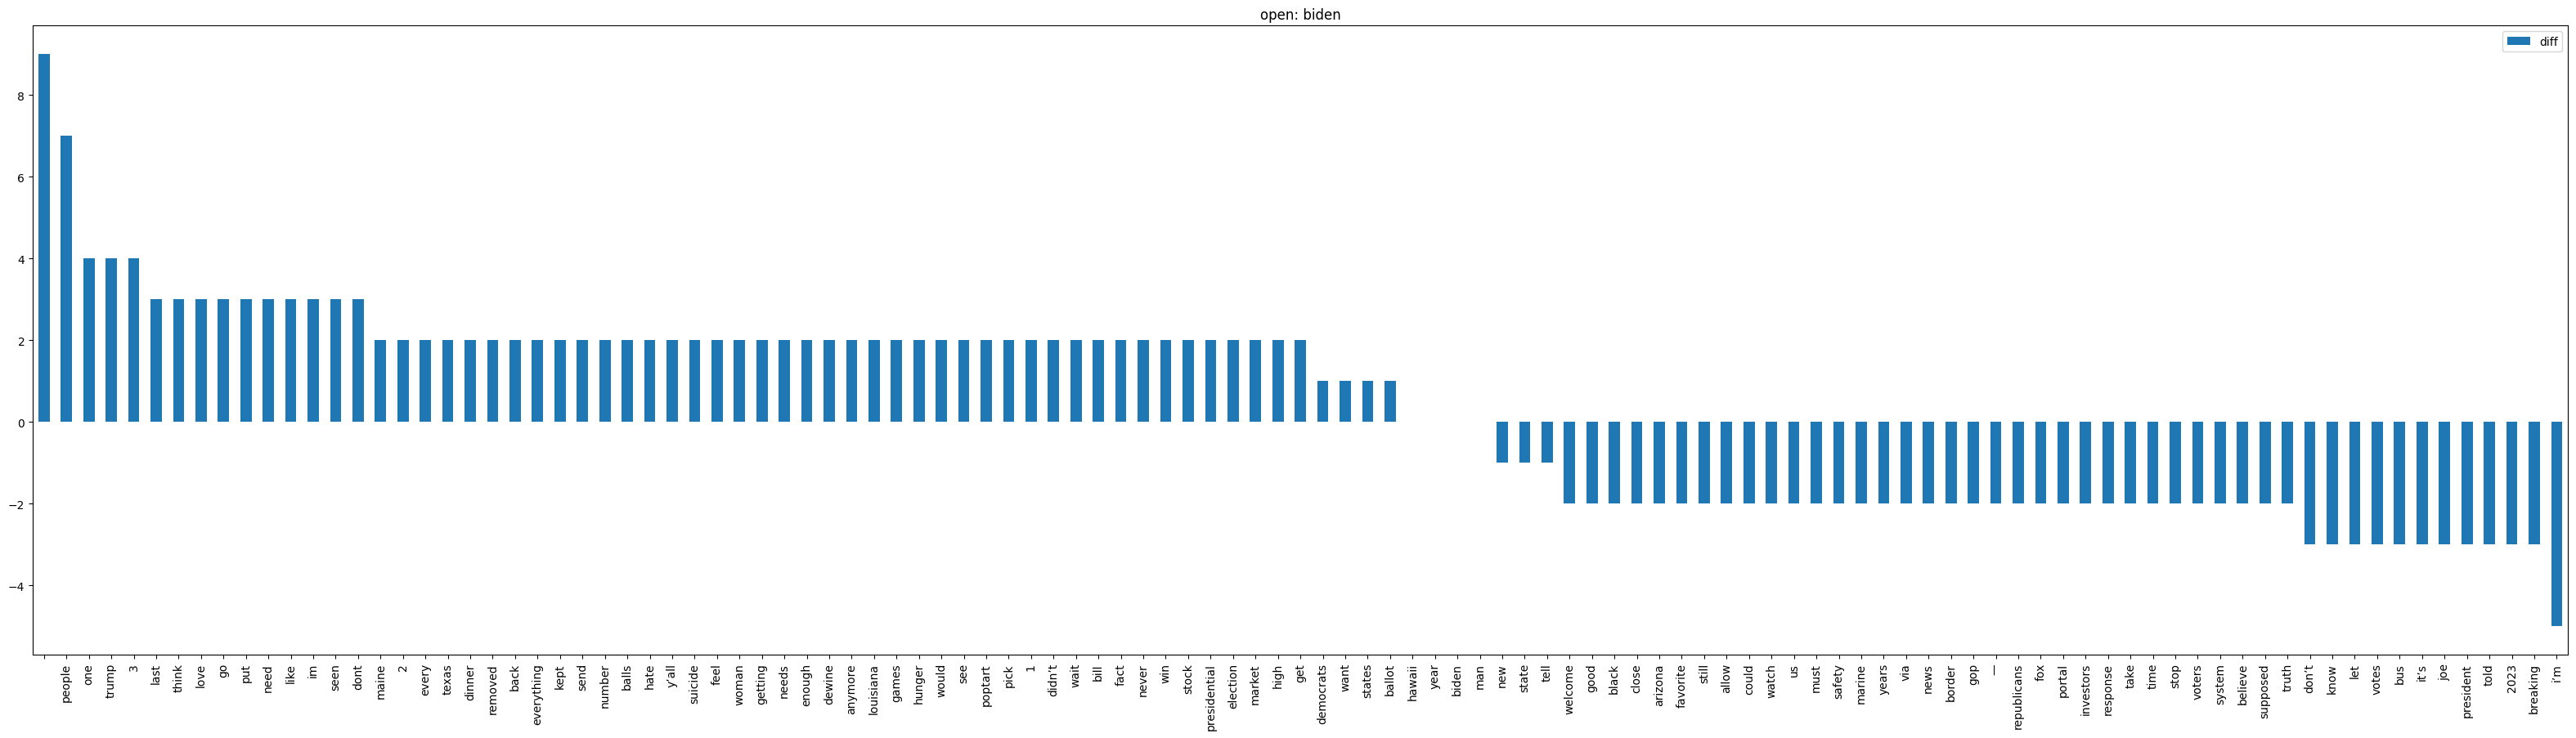

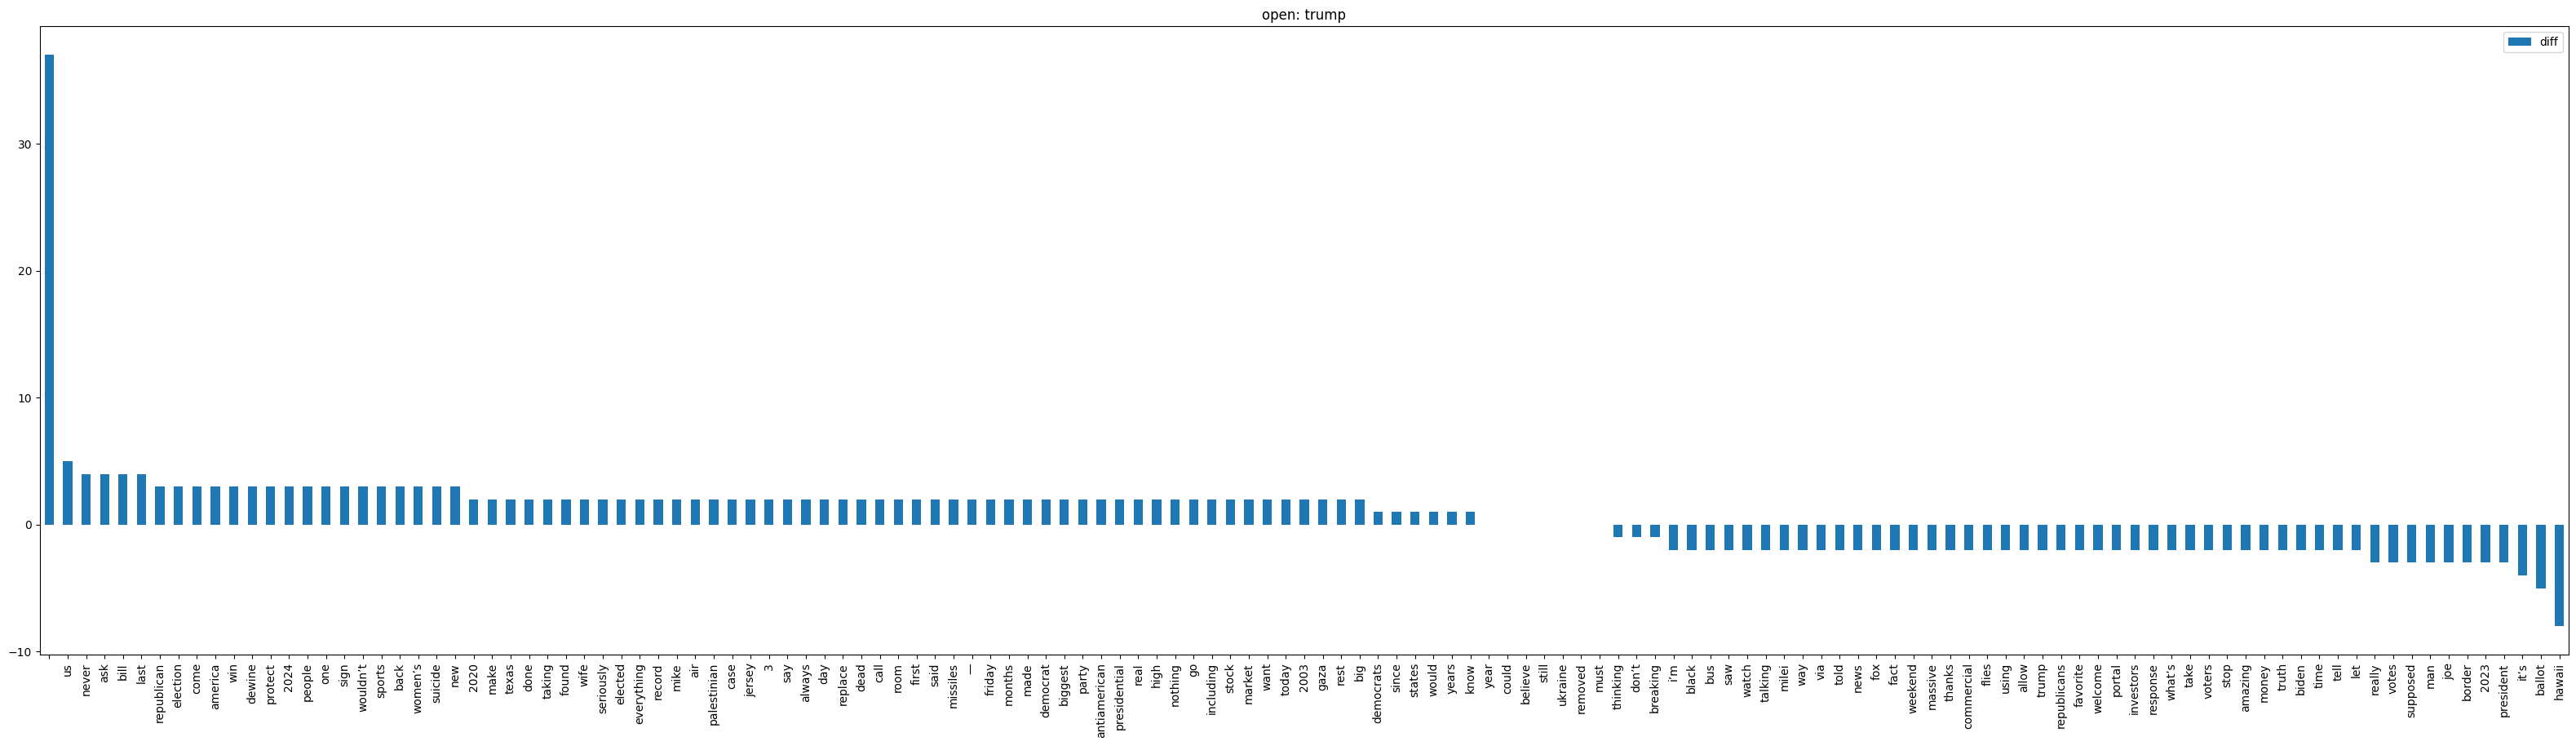

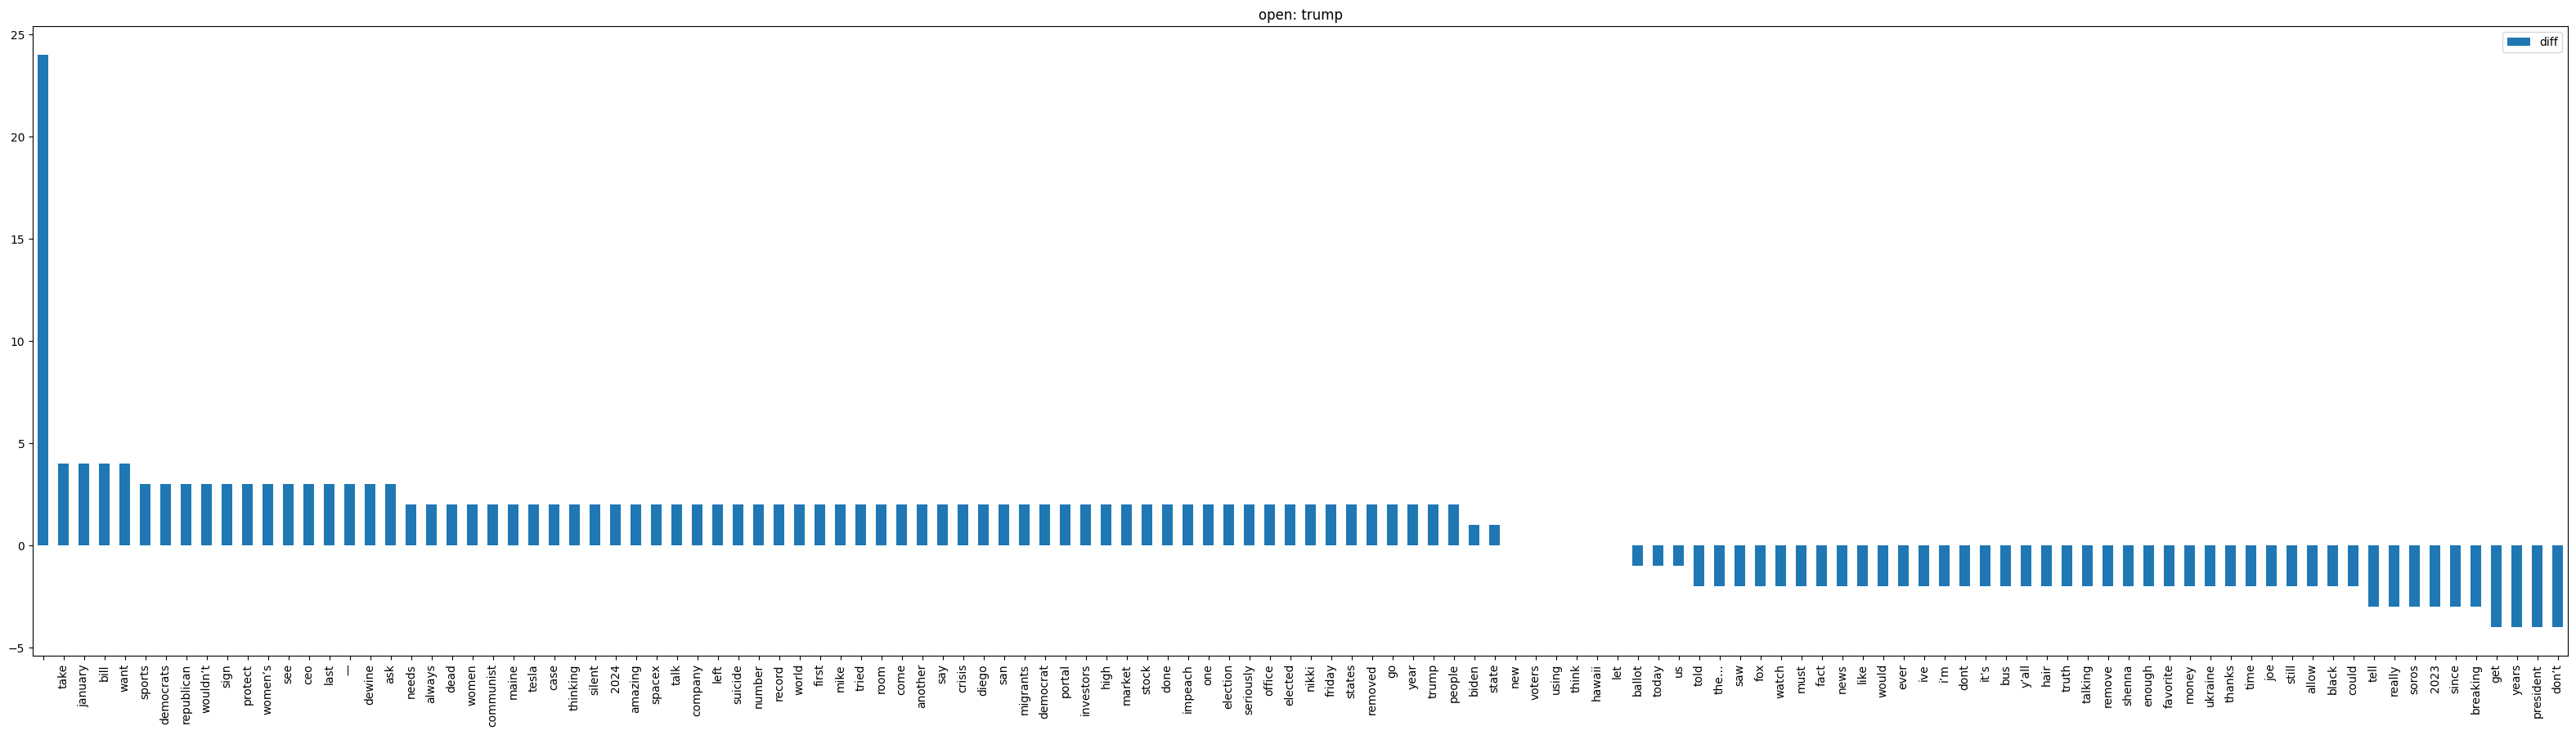

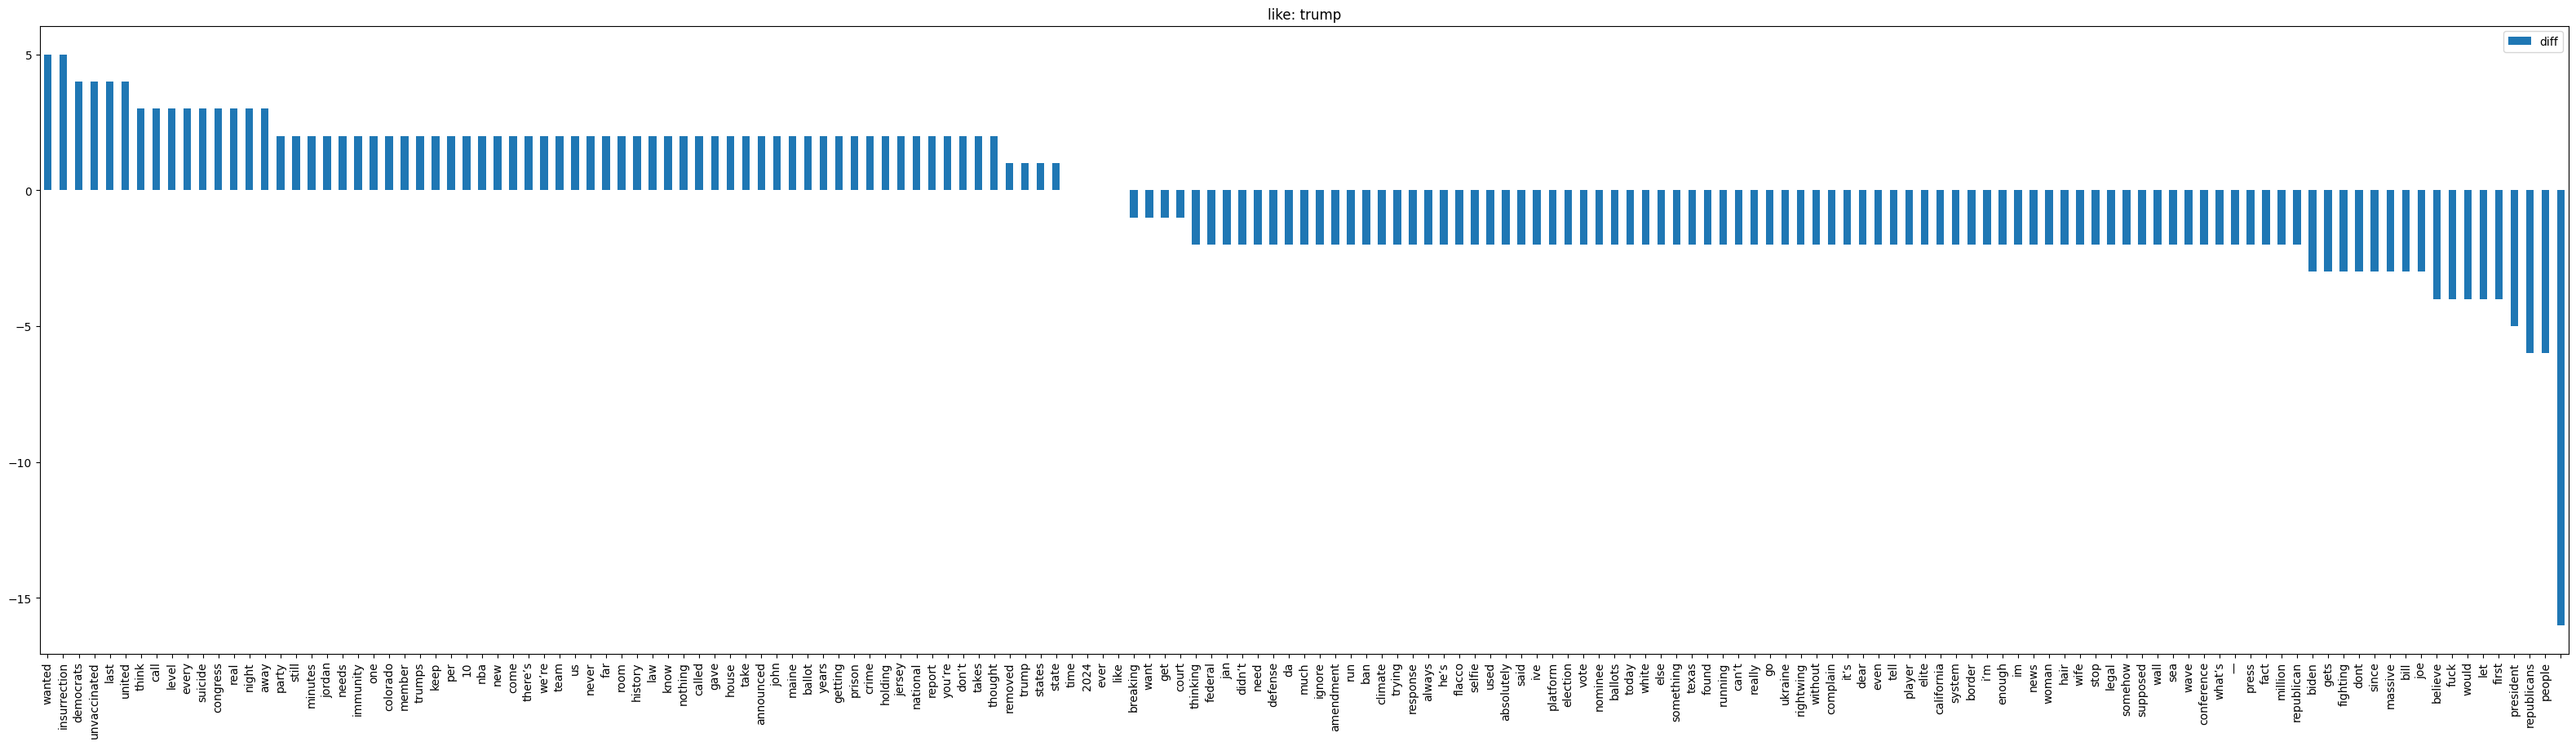

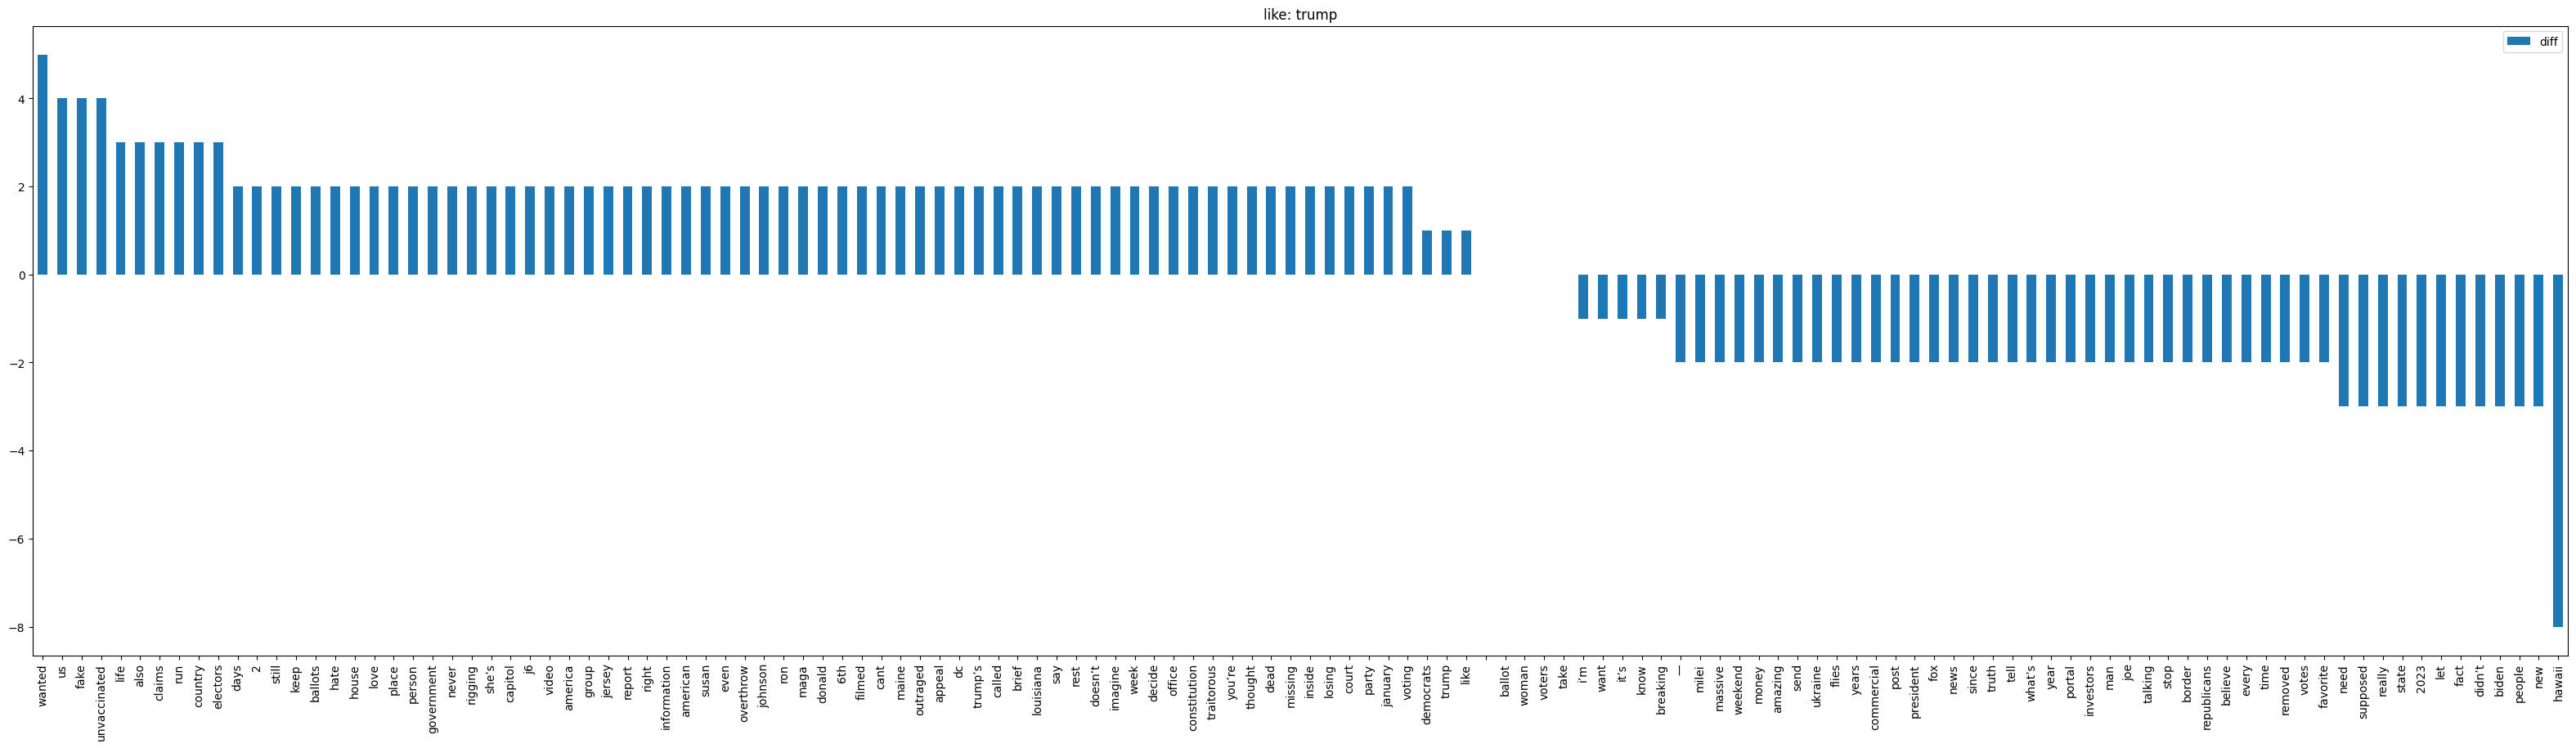

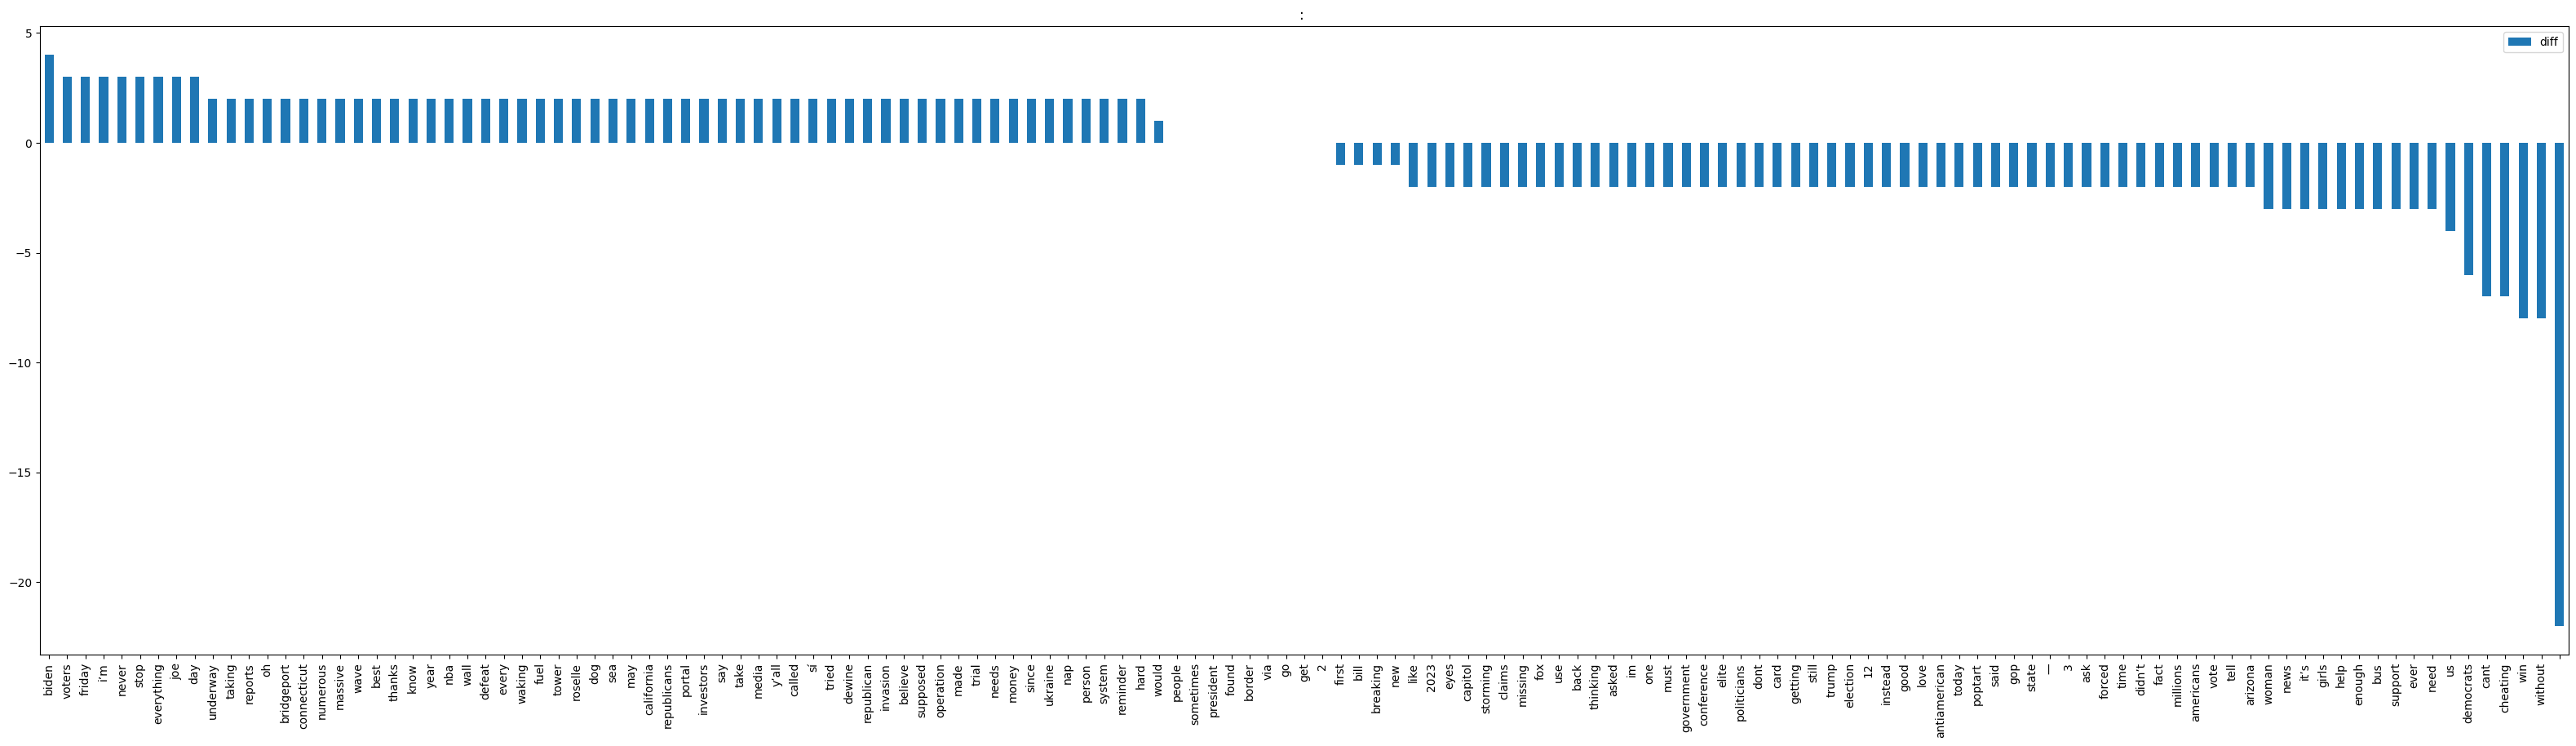

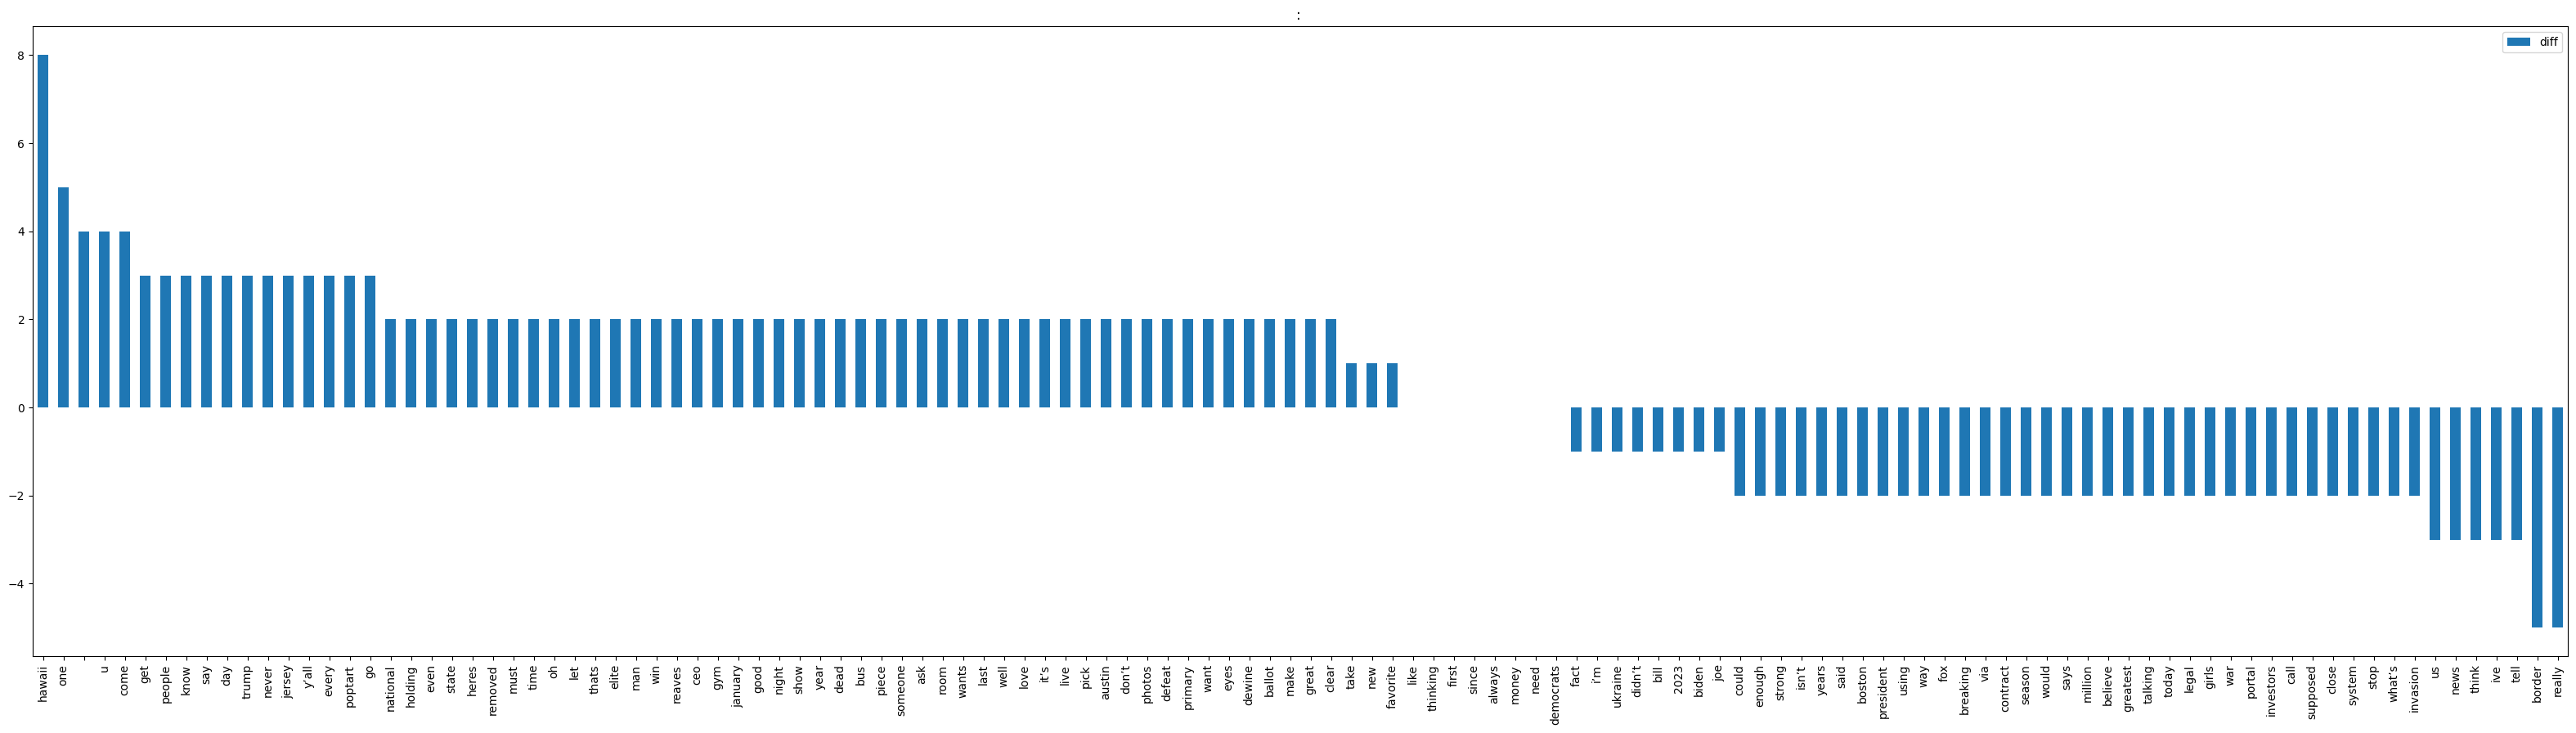

In [79]:
for user in twitter:
    # def comparePrePostText(user):
    action = user[0]['action']
    topic = user[0]['topic']

    pres = dict()
    posts = dict()
    for tick in user:
        pres[tick] = []
        for pre in user[tick]['pre']:
            text = processText(pre['text'])
            pres[tick] += text
        posts[tick] = []
        for post in user[tick]['post']:
            text = processText(post['text'])
            posts[tick] += text

    for tick in user:
        pres[tick] = Counter(pres[tick])
        pres[tick] = {k: v for k, v in pres[tick].items() if v > 1}
        posts[tick] = Counter(posts[tick])
        posts[tick] = {k: v for k, v in posts[tick].items() if v > 1}

    dfpre = pd.DataFrame.from_dict(pres, orient='index')
    dfpre.fillna(0, inplace=True)
    dfpre = dfpre.T
    dfpre.columns = [f'pre-{c}'for c in dfpre.columns]

    dfpost = pd.DataFrame.from_dict(posts, orient='index')
    dfpost.fillna(0, inplace=True)
    dfpost = dfpost.T
    dfpost.columns = [f'post-{c}'for c in dfpost.columns]

    df = pd.concat([dfpre, dfpost], axis=1)

    print(action, topic)

    dfplot = df.copy()
    dfplot['diff'] = dfplot['post-1'] - dfplot['pre-0']
    dfplot = dfplot.sort_values(by='diff', ascending=False)
    dfplot = dfplot[['diff']]
    plt.rcParams["figure.figsize"] = (40,10)
    dfplot.plot(kind='bar', stacked=False, title=f'{action}: {topic}')